In [203]:
#READING THE DATA
import pandas as pd
df = pd.read_excel("Solar_energy_data.xlsx")

In [204]:
df.head()

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Snow Depth,Wind Speed,Unnamed: 18
0,2000,1,1,0,0,0,0,0,0,0,0,-4,13.811437,982.749817,27.447862,174.755997,0,3.976945,NaN
1,2000,1,1,1,0,0,0,0,0,0,0,-4,13.117300,982.670105,29.048857,169.544205,0,4.017371,NaN
2,2000,1,1,2,0,0,0,0,0,0,0,-4,12.433960,982.404175,31.216659,156.340938,0,3.992325,NaN
3,2000,1,1,3,0,0,0,0,0,0,0,-3,11.797632,982.555298,34.956075,142.945864,0,3.981812,NaN
4,2000,1,1,4,0,0,0,0,0,0,0,-1,11.195487,982.558105,41.177540,129.625767,0,3.985008,NaN


In [205]:
df = df.drop(df.columns[-1], axis=1)
#Removed the last- Unnamed column

### Heatmap

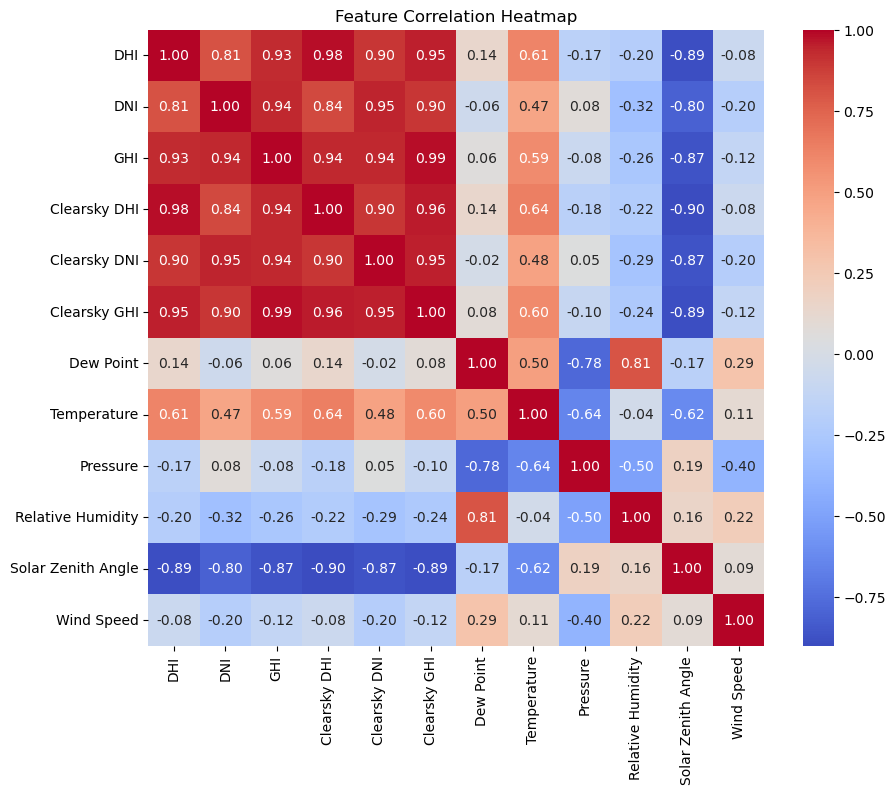

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_exclude = ['Year', 'Month', 'Day', 'Hour', 'Minute', 'Snow Depth']
df_filtered = df.drop(columns=columns_to_exclude)

correlation_matrix = df_filtered.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Feature Correlation Heatmap')
plt.show()

### Inferences from Feature Correlation Heatmap

- **Strong Positive Correlations**:
    - `GHI` has a very high correlation with `Clearsky GHI` (0.99), `Clearsky DNI` (0.94), and `DNI` (0.94), indicating close relationships in terms of solar irradiance.
    - `DHI` is strongly correlated with `Clearsky DHI` (0.98) and `GHI` (0.93), showing that diffuse irradiance and total irradiance under clear skies are closely related.
    - `Temperature` and `Dew Point` exhibit a moderate positive correlation (0.50), suggesting a link between these two atmospheric conditions.

- **Negative Correlations**:
    - `Solar Zenith Angle` has a strong negative correlation with `DHI` (-0.89), `DNI` (-0.80), and `GHI` (-0.87), meaning as the zenith angle increases (i.e., the sun is lower), irradiance decreases.
    - `Relative Humidity` has a strong negative correlation with `Temperature` (-0.50), indicating that higher humidity levels are associated with lower temperatures.

- **Weak or No Correlations**:
    - `Wind Speed` generally shows low correlations with other variables, suggesting it might not strongly influence solar irradiance or atmospheric conditions in this dataset.
    - `Pressure` has a minimal correlation with `Clearsky GHI` (-0.10), suggesting that pressure doesn't significantly impact clear sky global horizontal irradiance in this dataset.

.


In [194]:
df_filtered.head()

,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Wind Speed
0,0,0,0,0,0,0,-4,13.811437,982.749817,27.447862,174.755997,3.976945
1,0,0,0,0,0,0,-4,13.117300,982.670105,29.048857,169.544205,4.017371
2,0,0,0,0,0,0,-4,12.433960,982.404175,31.216659,156.340938,3.992325
3,0,0,0,0,0,0,-3,11.797632,982.555298,34.956075,142.945864,3.981812
4,0,0,0,0,0,0,-1,11.195487,982.558105,41.177540,129.625767,3.985008


### Factor Analysis

In [196]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity
import matplotlib.pyplot as plt
import seaborn as sns

scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_filtered)


#### We will do 2 tests--
  - Bartlett’s Test of Sphericity: To check whether the correlation matrix is significant.
  - Kaiser-Meyer-Olkin (KMO) Test: To ensure that factor analysis is appropriate for the data.

In [197]:
chi_square_value, p_value = calculate_bartlett_sphericity(df_standardized)
print(f"Bartlett's test p-value: {p_value}")

kmo_all, kmo_model = calculate_kmo(df_standardized)
print(f'KMO Test Statistic: {kmo_model}')


Bartlett's test p-value: 0.0
KMO Test Statistic: 0.6675054318359778


- The p-value for the Bartlett's Test of Sphericity comes out to be 0. Hence, we can reject the null hypothesis and conclude that the correlation matrix is significant. 
- The KMO statistic for the data comes out to be 0.667. Hence, factor analysis is appropriate for this data


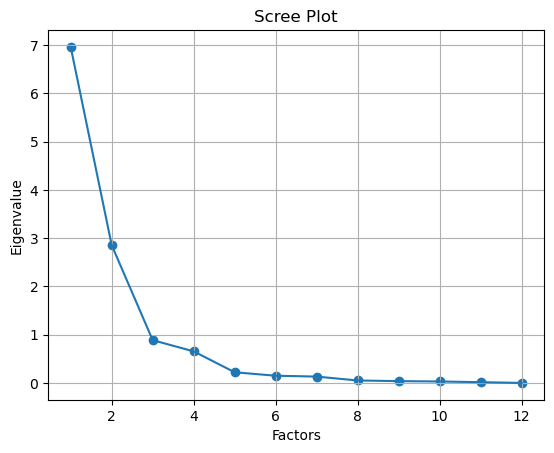

Eigenvalues: [6.95976474e+00 2.85493726e+00 8.87024332e-01 6.54544578e-01
 2.22039055e-01 1.50172822e-01 1.32365753e-01 5.18783725e-02
 3.81878115e-02 3.12778197e-02 1.65730593e-02 1.23440443e-03]


In [199]:
fa = FactorAnalyzer(n_factors=5, rotation="varimax")
fa.fit(df_standardized)

ev, v = fa.get_eigenvalues()

plt.scatter(range(1, df_filtered.shape[1]+1), ev)
plt.plot(range(1, df_filtered.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()
print(f"Eigenvalues: {ev}")


In [201]:
loadings = fa.loadings_
factor_loadings_df = pd.DataFrame(loadings, index=df_filtered.columns, columns=[f"Factor{i+1}" for i in range(loadings.shape[1])])
print(factor_loadings_df)


                     Factor1   Factor2   Factor3   Factor4   Factor5
DHI                 0.953516 -0.005427  0.171982  0.000333 -0.203210
DNI                 0.915372 -0.125941  0.040481 -0.140955  0.342583
GHI                 0.966463 -0.063213  0.141178 -0.040472  0.098518
Clearsky DHI        0.957769 -0.019004  0.198555  0.015053 -0.143358
Clearsky DNI        0.954352 -0.085731  0.040519 -0.160086  0.105603
Clearsky GHI        0.976341 -0.038791  0.140615 -0.042502  0.003492
Dew Point           0.074784  0.855183  0.384439  0.210445 -0.011781
Temperature         0.497095  0.125711  0.849331  0.107374  0.025972
Pressure           -0.055569 -0.533940 -0.592257 -0.440330  0.073821
Relative Humidity  -0.193674  0.970861 -0.082654  0.098306  0.001557
Solar Zenith Angle -0.884245 -0.039563 -0.215596  0.042834  0.044532
Wind Speed         -0.104322  0.159156  0.092089  0.591938 -0.004259


#### Factor 1:

- Strong contributors: DHI (0.95), DNI (0.92), GHI (0.97), Clearsky DHI (0.96), Clearsky DNI (0.95), Clearsky GHI (0.98), Solar Zenith Angle (-0.88).
- Interpretation: Factor 1 is likely capturing solar radiation-related variables. All variables related to solar energy have high positive loadings, meaning this factor  represents the common variance across these variables.

#### Factor 2:

- Strong contributors: Dew Point (0.86), Relative Humidity (0.97), and a negative loading for Pressure (-0.53).
- Interpretation: Factor 2 seems to be related to atmospheric conditions, such as humidity and pressure. High humidity and dew point loadings suggest this factor captures  moisture-related atmospheric properties.

##### Clearly, GHI has one of the most Significant factor loadings in the principal factor.Hence, it matches our theoretical understanding that GHI is indeed the most important variable and from here onwards, GHI would be used for solar energy forecasting.(Not using Clearsky_GHI since it s a theoretical estimate assuming ideal conditions with no clouds or obstructions)  

### Plotting the Data(Weekly, daily and monthly)

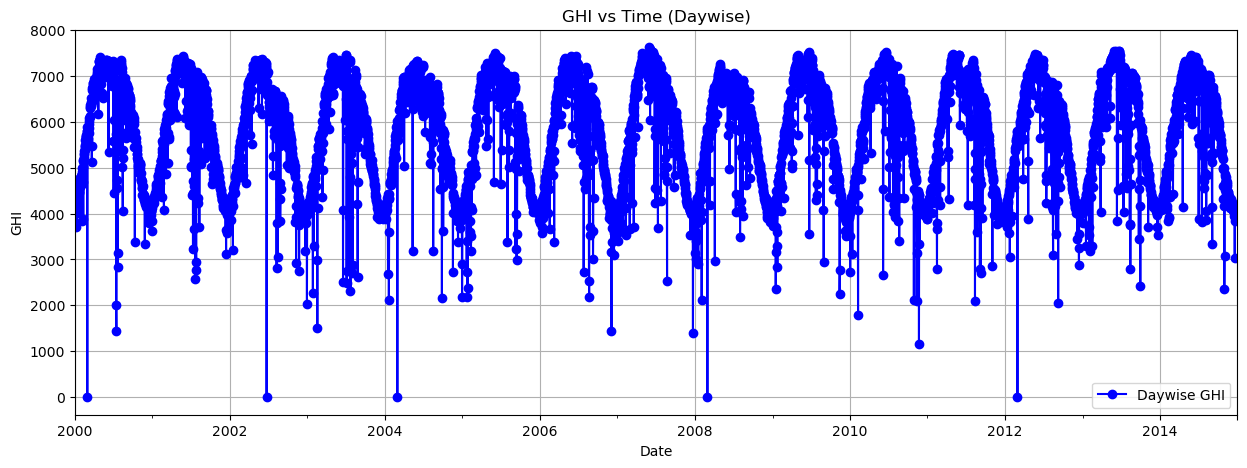

In [206]:
import matplotlib.pyplot as plt

df['Datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour', 'Minute']])
df.set_index('Datetime', inplace=True)

# Daywise plot of GHI
plt.figure(figsize=(15, 5))
df['GHI'].resample('D').sum().plot(label='Daywise GHI', color='blue', marker='o')
plt.title('GHI vs Time (Daywise)')
plt.xlabel('Date')
plt.ylabel('GHI')
plt.grid(True)
plt.legend()
plt.show()

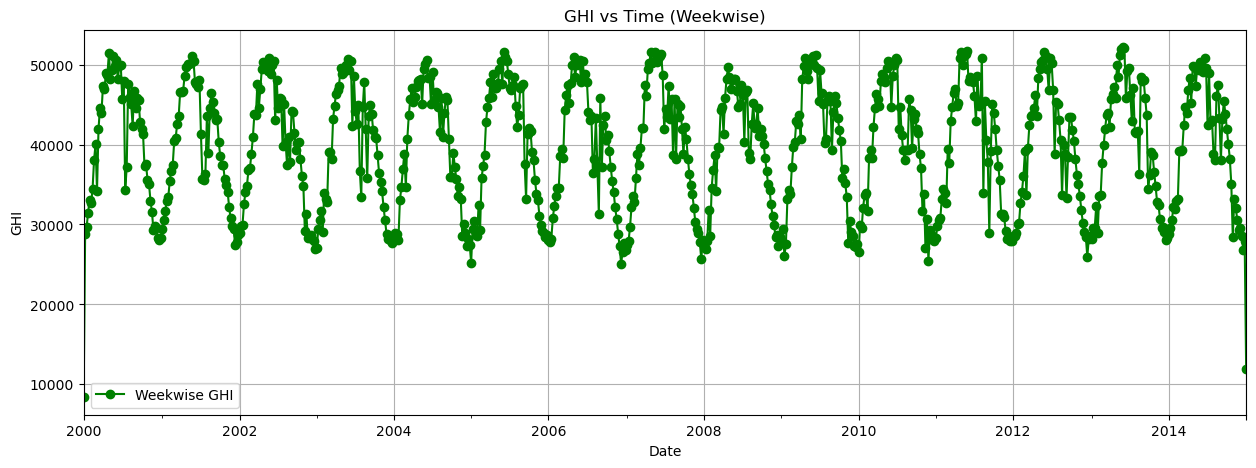

In [207]:
# Weekwise plot of GHI
plt.figure(figsize=(15, 5))
df['GHI'].resample('W').sum().plot(label='Weekwise GHI', color='green', marker='o')
plt.title('GHI vs Time (Weekwise)')
plt.xlabel('Date')
plt.ylabel('GHI')
plt.grid(True)
plt.legend()
plt.show()

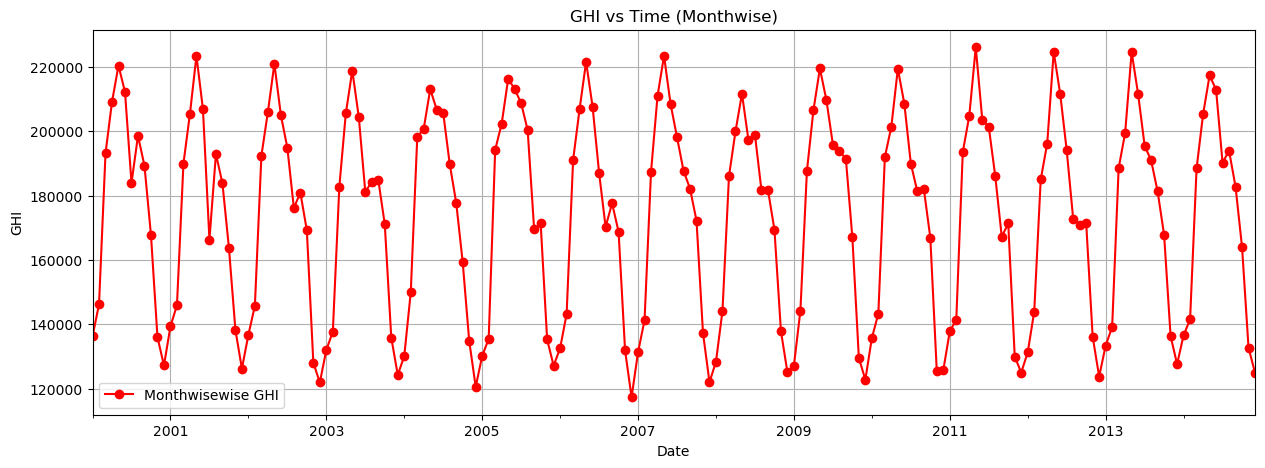

In [209]:
# Monthwise plot of GHI
plt.figure(figsize=(15, 5))
df['GHI'].resample('M').sum().plot(label='Monthwisewise GHI', color='red', marker='o')
plt.title('GHI vs Time (Monthwise)')
plt.xlabel('Date')
plt.ylabel('GHI')
plt.grid(True)
plt.legend()
plt.show()

In [210]:
df.head()

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Snow Depth,Wind Speed
Datetime,,,,,,,,,,,,,,,,,,
2000-01-01 00:00:00,2000,1,1,0,0,0,0,0,0,0,0,-4,13.811437,982.749817,27.447862,174.755997,0,3.976945
2000-01-01 01:00:00,2000,1,1,1,0,0,0,0,0,0,0,-4,13.117300,982.670105,29.048857,169.544205,0,4.017371
2000-01-01 02:00:00,2000,1,1,2,0,0,0,0,0,0,0,-4,12.433960,982.404175,31.216659,156.340938,0,3.992325
2000-01-01 03:00:00,2000,1,1,3,0,0,0,0,0,0,0,-3,11.797632,982.555298,34.956075,142.945864,0,3.981812
2000-01-01 04:00:00,2000,1,1,4,0,0,0,0,0,0,0,-1,11.195487,982.558105,41.177540,129.625767,0,3.985008


### Distribution Fit

#### KS Test

In [212]:
import numpy as np
from scipy.stats import kstest, expon, norm, gamma, weibull_min, weibull_max, lognorm, beta

# Resampling the data for daily and weekly aggregation
daily_ghi = df['GHI'].resample('D').sum().dropna()
weekly_ghi = df['GHI'].resample('W').sum().dropna()
monthly_ghi = df['GHI'].resample('M').sum().dropna()

distributions = {
    'Weibull Min': weibull_min,
    'Weibull Max': weibull_max,
    'Normal': norm,
    'Gamma': gamma,
    'Exponential': expon,
    'Lognormal': lognorm,
    'Beta': beta
}

def perform_ks_test(data, distributions):
    results = {}
    for dist_name, dist in distributions.items():

        params = dist.fit(data)
 
        D, p_value = kstest(data, dist.cdf, args=params)
     
        results[dist_name] = p_value
    return results


daily_results = perform_ks_test(daily_ghi, distributions)
print("Results of Daily K-S Test:")
print(daily_results)


weekly_results = perform_ks_test(weekly_ghi, distributions)
print("Results of Weekly K-S Test:")
print(weekly_results)


monthly_results = perform_ks_test(monthly_ghi, distributions)
print("Results of Monthly K-S Test:")
print(monthly_results)

Results of Daily K-S Test:
{'Weibull Min': 7.610663069707465e-33, 'Weibull Max': 0.0, 'Normal': 9.09105640421535e-42, 'Gamma': 1.0179614383605998e-45, 'Exponential': 0.0, 'Lognormal': 9.365414534216312e-45, 'Beta': 5.3657591773055855e-22}
Results of Weekly K-S Test:
{'Weibull Min': 0.00010883609213179347, 'Weibull Max': 0.0, 'Normal': 7.365755775961561e-06, 'Gamma': 3.11065162612748e-06, 'Exponential': 5.663317611969558e-132, 'Lognormal': 7.365487102662547e-06, 'Beta': 0.0025688391965490915}
Results of Monthly K-S Test:
{'Weibull Min': 0.00105445561508221, 'Weibull Max': 1.252033016286025e-124, 'Normal': 0.0028653794471772344, 'Gamma': 0.003562361754243989, 'Exponential': 6.6513301597449135e-09, 'Lognormal': 0.002865387541716588, 'Beta': 0.00028246363372057455}


### Interpretation:
- The extremely low p-values in the Daily K-S test (all close to \(0\)) indicate that the distributions of the data significantly differ from the proposed distributions (Weibull, Normal, Gamma, etc.).
- In the Weekly K-S test, while some distributions (such as the Exponential and the Gamma) also show very low p-values, the Beta distribution has a higher p-value (\(0.0026\)), suggesting a slightly better fit compared to others.
- In the Monthly K-S test, Gamma distribution has a higher p value, suggestion a better fit than others.
- Overall, both tests suggest that the data does not follow the tested distributions closely.

#### Maximum Likelihood Estimate

In [13]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

#WEEKLY RESULTS---

ghi_data = weekly_ghi  

distributions = {
    'Normal': stats.norm,
    'Weibull Min': stats.weibull_min,
    'Weibull Max': stats.weibull_max,
    'Gamma': stats.gamma,
    'Exponential': stats.expon,
    'Lognormal': stats.lognorm,
    'Beta': stats.beta
}


def fit_distributions(data, dist_list):
    results = []
    for dist_name, dist in dist_list.items():
        try:
            params = dist.fit(data)
            log_likelihood = np.sum(dist.logpdf(data, *params))
            k = len(params)
            aic = 2 * k - 2 * log_likelihood
            results.append((dist_name, params, log_likelihood, aic))
            
        except Exception as e:
         
            print(f"Could not fit {dist_name}: {e}")
            continue
    return results

mle_results = fit_distributions(ghi_data, distributions)

mle_results = sorted(mle_results, key=lambda x: x[3])


print("Best-fit distribution based on AIC:")
for dist_name, params, log_likelihood, aic in mle_results:
    print(f"Distribution: {dist_name}, AIC: {aic:.2f}, Log-Likelihood: {log_likelihood:.2f}, Parameters: {params}")


Best-fit distribution based on AIC:
Distribution: Beta, AIC: 16127.43, Log-Likelihood: -8059.71, Parameters: (4.148669198590089, 1.5043185884725936, 6225.926290374518, 46004.77177678306)
Distribution: Weibull Min, AIC: 16224.95, Log-Likelihood: -8109.47, Parameters: (8.960910329208785, -17429.76613095709, 60619.37616054635)
Distribution: Normal, AIC: 16262.81, Log-Likelihood: -8129.40, Parameters: (39870.86096938775, 7709.421507110176)
Distribution: Lognormal, AIC: 16264.81, Log-Likelihood: -8129.40, Parameters: (1.7949769513592477e-06, -4294958906.999989, 4294998777.854039)
Distribution: Gamma, AIC: 16275.12, Log-Likelihood: -8134.56, Parameters: (321.97891931622377, -100137.60936323844, 434.73682479655395)
Distribution: Exponential, AIC: 17812.04, Log-Likelihood: -8904.02, Parameters: (8389.0, 31481.86096938775)
Distribution: Weibull Max, AIC: 20224.66, Log-Likelihood: -10109.33, Parameters: (0.09320375823055216, 52175.00000000001, 1.7373246524138368)


In [101]:
#DAILY RESULTS---

mle_results_daily = fit_distributions(daily_ghi, distributions)
mle_results_daily = sorted(mle_results_daily, key=lambda x: x[3])
print("Best-fit distribution based on AIC:")
for dist_name, params, log_likelihood, aic in mle_results_daily:
    print(f"Distribution: {dist_name}, AIC: {aic:.2f}, Log-Likelihood: {log_likelihood:.2f}, Parameters: {params}")

Best-fit distribution based on AIC:
Distribution: Beta, AIC: 92187.54, Log-Likelihood: -46089.77, Parameters: (5.457928687019576, 1.6559768552864358, -576.2297687088193, 8199.483626393694)
Distribution: Weibull Min, AIC: 92870.95, Log-Likelihood: -46432.48, Parameters: (17.918123200259046, -11880.321474480654, 18128.749213703948)
Distribution: Normal, AIC: 93250.56, Log-Likelihood: -46623.28, Parameters: (5705.1934659609415, 1200.522507839018)
Distribution: Lognormal, AIC: 93293.20, Log-Likelihood: -46643.60, Parameters: (0.016210983986851155, -68696.3836426035, 74383.53845519459)
Distribution: Gamma, AIC: 93810.32, Log-Likelihood: -46902.16, Parameters: (23.164927599110648, -898.1414467123095, 283.6115771133673)
Distribution: Exponential, AIC: 105739.19, Log-Likelihood: -52867.60, Parameters: (0.0, 5705.1934659609415)
Distribution: Weibull Max, AIC: 118963.58, Log-Likelihood: -59478.79, Parameters: (0.11765908853988745, 7622.000000000001, 1.738378182434325)


c:\Users\shubh\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:6554: RuntimeWarning: divide by zero encountered in log
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)


In [213]:
#MONTHLY RESULTS---

mle_results_monthly = fit_distributions(monthly_ghi, distributions)
mle_results_monthly = sorted(mle_results_monthly, key=lambda x: x[3])
print("Best-fit distribution based on AIC:")
for dist_name, params, log_likelihood, aic in mle_results_monthly:
    print(f"Distribution: {dist_name}, AIC: {aic:.2f}, Log-Likelihood: {log_likelihood:.2f}, Parameters: {params}")

Best-fit distribution based on AIC:
Distribution: Beta, AIC: 4182.57, Log-Likelihood: -2087.29, Parameters: (0.7915299880688433, 0.6201203974605471, 117312.49034853581, 108777.5096514642)
Distribution: Weibull Min, AIC: 4239.94, Log-Likelihood: -2116.97, Parameters: (4.574653223424033, 51202.66794399235, 134612.99745006696)
Distribution: Normal, AIC: 4246.46, Log-Likelihood: -2121.23, Parameters: (173659.75, 31751.078169773315)
Distribution: Lognormal, AIC: 4248.46, Log-Likelihood: -2121.23, Parameters: (4.6204707987834403e-07, -68718104765.41798, 68718278425.160645)
Distribution: Gamma, AIC: 4250.10, Log-Likelihood: -2122.05, Parameters: (287.1233836243106, -368716.47592486185, 1888.6845650347154)
Distribution: Exponential, AIC: 4301.80, Log-Likelihood: -2148.90, Parameters: (117367.0, 56292.75)
Distribution: Weibull Max, AIC: 5187.42, Log-Likelihood: -2590.71, Parameters: (0.07177289609597785, 226090.00000000003, 1.7183184473313513)


### Fitting the Best-distribution

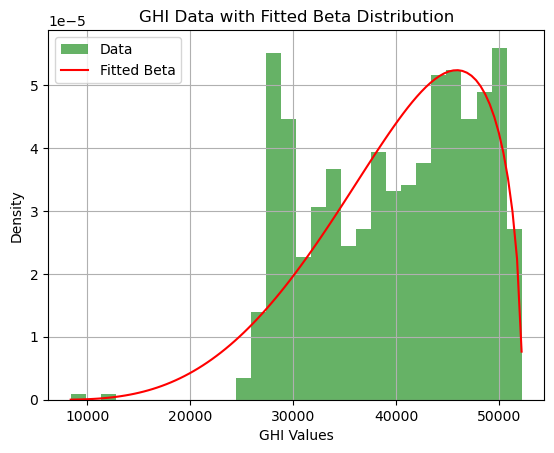

In [14]:
best_dist_name = 'Beta'
best_dist = stats.beta 

params = best_dist.fit(weekly_ghi)

x = np.linspace(min(weekly_ghi), max(weekly_ghi), 100)

plt.hist(weekly_ghi, bins=30, density=True, alpha=0.6, color='g', label='Data')


pdf_fitted = best_dist.pdf(x, *params)  
plt.plot(x, pdf_fitted, 'r-', label=f'Fitted {best_dist_name}')

plt.title('GHI Data with Fitted Beta Distribution')
plt.xlabel('GHI Values')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

 We can try and fit for monthly as well. Although it's clear from the tests that none of these distributions is actually an acceptable fit.

### Stationarity Check-- Using ADF Test

In [217]:
from statsmodels.tsa.stattools import adfuller
def adf_test(data):
    
    adf_result = adfuller(data)
    adf_statistic = adf_result[0]
    p_value = adf_result[1]
    return adf_statistic, p_value


daily_adf_statistic, daily_p_value = adf_test(daily_ghi)
weekly_adf_statistic, weekly_p_value = adf_test(weekly_ghi)
monthly_adf_statistic, monthly_p_value = adf_test(monthly_ghi)


results = {
    "Daily": {
        "ADF Statistic": daily_adf_statistic,
        "p-value": daily_p_value
    },
    "Weekly": {
        "ADF Statistic": weekly_adf_statistic,
        "p-value": weekly_p_value
    },
    "Monthly": {
        "ADF Statistic": monthly_adf_statistic,
        "p-value": monthly_p_value
    }
}

for period, result in results.items():
    print(f"{period} ADF Statistic: {result['ADF Statistic']:.6f}, p-value: {result['p-value']:.6e}")

Daily ADF Statistic: -5.373508, p-value: 3.849304e-06
Weekly ADF Statistic: -8.833227, p-value: 1.746871e-14
Monthly ADF Statistic: -4.047841, p-value: 1.179714e-03


Daily ADF Statistic: -5.373508, p-value: 3.849304e-06
- Very low p-value (< 0.05) → Reject null hypothesis → Daily GHI is stationary.

Weekly ADF Statistic: -8.833227, p-value: 1.746871e-14
- Extremely low p-value → Reject null hypothesis → Weekly GHI is stationary.

Monthly ADF Statistic: -4.047841, p-value: 0.00118
- Low p-value → Reject null hypothesis → Monthly GHI is also stationary

In [219]:
from statsmodels.tsa.stattools import kpss
def kpss_test(data):
 
    kpss_statistic, p_value, _, critical_values = kpss(data, regression='c')
    return kpss_statistic, p_value, critical_values

daily_kpss_statistic, daily_p_value, daily_critical_values = kpss_test(daily_ghi)
weekly_kpss_statistic, weekly_p_value, weekly_critical_values = kpss_test(weekly_ghi)
monthly_kpss_statistic, monthly_p_value, monthly_critical_values = kpss_test(monthly_ghi)

results = {
    "Daily": {
        "KPSS Statistic": daily_kpss_statistic,
        "p-value": daily_p_value,
        "Critical Values": daily_critical_values
    },
    "Weekly": {
        "KPSS Statistic": weekly_kpss_statistic,
        "p-value": weekly_p_value,
        "Critical Values": weekly_critical_values
    },
    "Monthly": {
        "KPSS Statistic": monthly_kpss_statistic,
        "p-value": monthly_p_value,
        "Critical Values": monthly_critical_values
    }
    
}


for period, result in results.items():
    print(f"{period} KPSS Statistic: {result['KPSS Statistic']:.6f}, p-value: {result['p-value']:.6e}")
    print(f"Critical Values: {result['Critical Values']}")

Daily KPSS Statistic: 0.020649, p-value: 1.000000e-01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Weekly KPSS Statistic: 0.010424, p-value: 1.000000e-01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Monthly KPSS Statistic: 0.012259, p-value: 1.000000e-01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


### KPSS Test Inference

- **Daily GHI**: The KPSS statistic (0.020649) is **less than the critical values** at all significance levels. Therefore, we **fail to reject the null hypothesis** and conclude that the Daily GHI is **stationary**.

- **Weekly GHI**: The KPSS statistic (0.010424) is **less than the critical values** at all significance levels. Thus, we **fail to reject the null hypothesis**, indicating that the Weekly GHI is **stationary**.

- **Monthly GHI**: The KPSS statistic (0.012259) is **less than the critical values** at all significance levels. Hence, we **fail to reject the null hypothesis**, meaning the Monthly GHI is **stationary**.

### Overall Conclusion
All time series (Daily, Weekly, Monthly GHI) are found to be **stationary** based on both tests


## Time series Decomposition

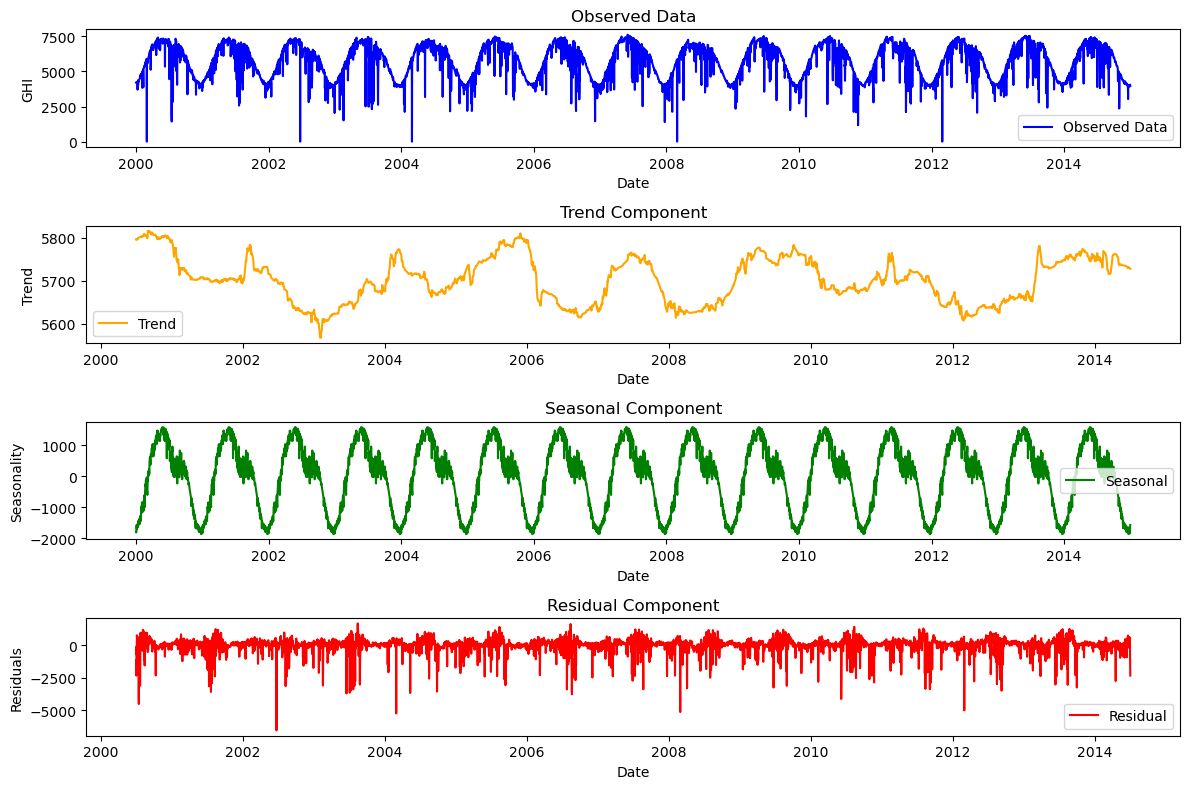

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
period = 365


decomposition = seasonal_decompose(daily_ghi, model='additive', period=period)

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(daily_ghi, label='Observed Data', color='blue')
plt.title('Observed Data')
plt.xlabel('Date')
plt.ylabel('GHI')
plt.legend()


plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.title('Trend Component')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.legend()


plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.title('Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Seasonality')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.title('Residual Component')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()

plt.tight_layout()
plt.show()

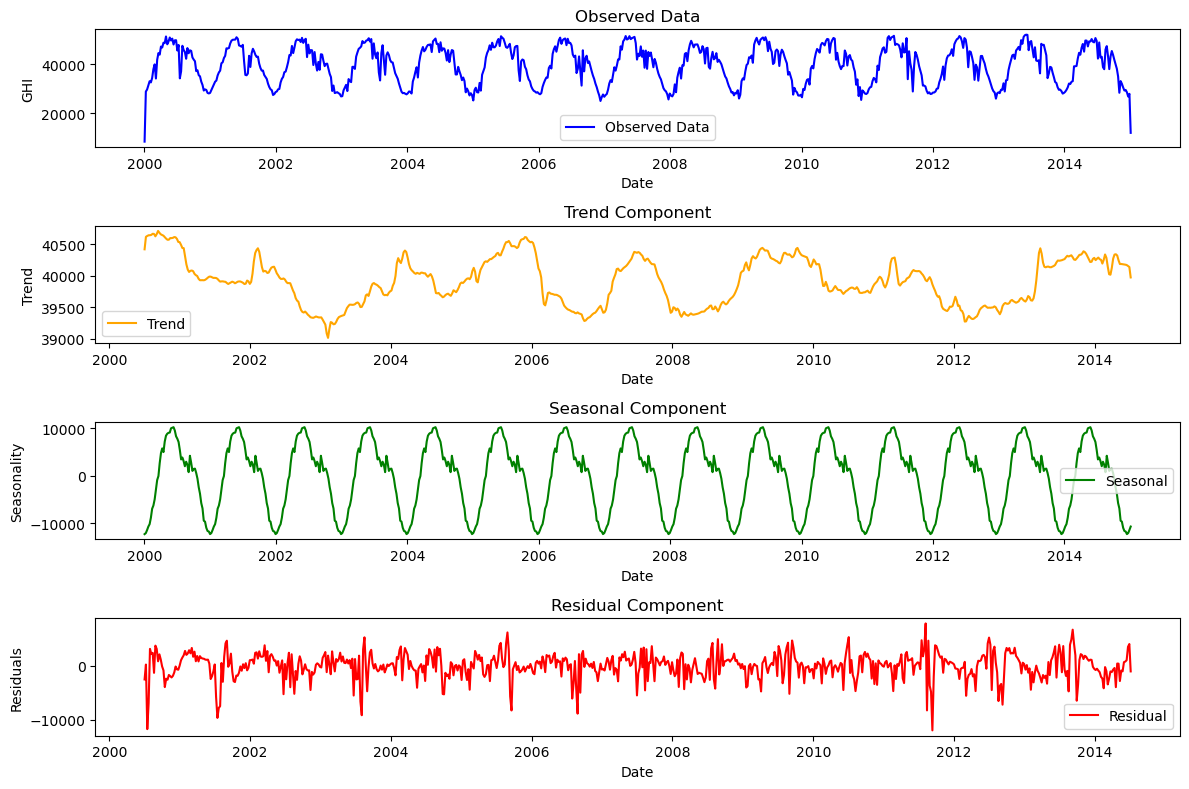

In [18]:
#now doing it for weekly data
period = 52

decomposition = seasonal_decompose(weekly_ghi, model='additive', period=52)
plt.figure(figsize=(12, 8))


plt.subplot(4, 1, 1)
plt.plot(weekly_ghi, label='Observed Data', color='blue')
plt.title('Observed Data')
plt.xlabel('Date')
plt.ylabel('GHI')
plt.legend()


plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.title('Trend Component')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.legend()


plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.title('Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Seasonality')
plt.legend()


plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.title('Residual Component')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()

plt.tight_layout()
plt.show()

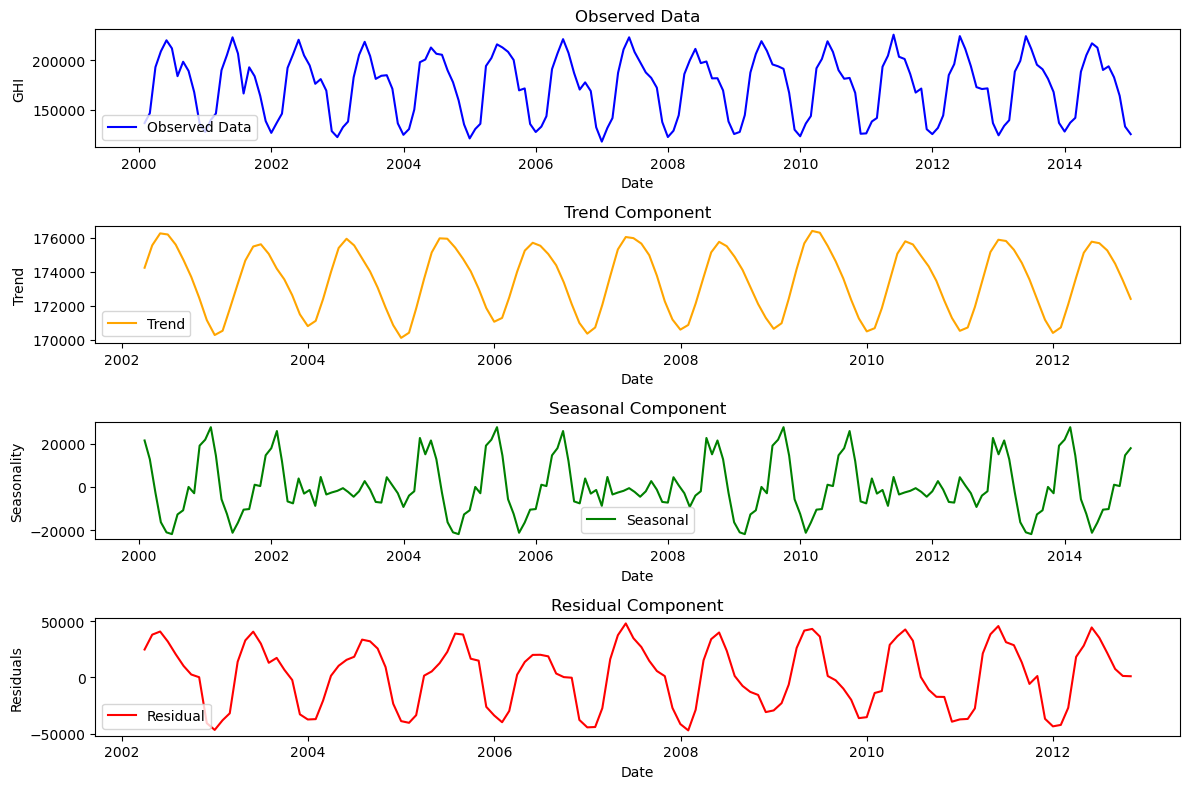

In [224]:
#now doing it for weekly data
period = 52

decomposition = seasonal_decompose(monthly_ghi, model='additive', period=52)
plt.figure(figsize=(12, 8))


plt.subplot(4, 1, 1)
plt.plot(monthly_ghi, label='Observed Data', color='blue')
plt.title('Observed Data')
plt.xlabel('Date')
plt.ylabel('GHI')
plt.legend()


plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.title('Trend Component')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.legend()


plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.title('Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Seasonality')
plt.legend()


plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.title('Residual Component')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()

plt.tight_layout()
plt.show()

The residuals still show a seasonal pattern after decomposition, meaning that the decomposition process has not fully captured all of the seasonality present in the data. This means there may be additional, more complex or higher-frequency seasonal patterns.

### We will restrict our analysis to daily and weekly data, as asked in the problem statement

### Making the ACF and PACF plots 

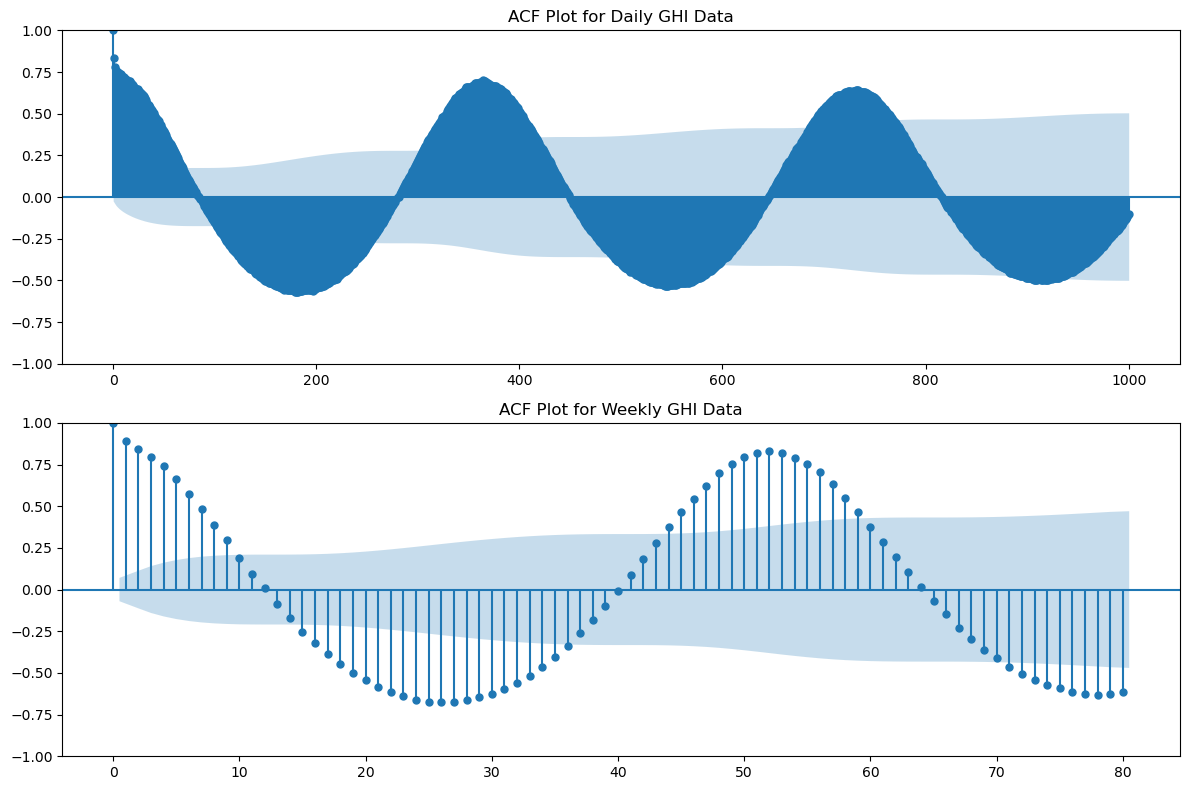

In [20]:
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(daily_ghi, lags=1000, ax=ax[0])
ax[0].set_title('ACF Plot for Daily GHI Data')

plot_acf(weekly_ghi, lags=80, ax=ax[1])
ax[1].set_title('ACF Plot for Weekly GHI Data')

plt.tight_layout()
plt.show()

- The strong cyclical pattern in the ACF indicates seasonality in the data, likely with a repeating period (around 400-500 lags for daily and around 55 lags for weekly). 

<Figure size 1000x600 with 0 Axes>

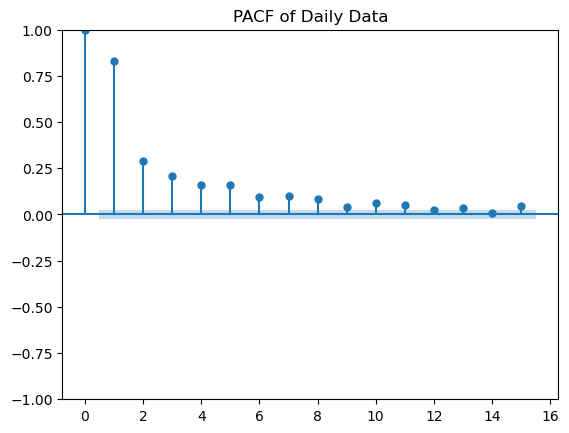

<Figure size 1000x600 with 0 Axes>

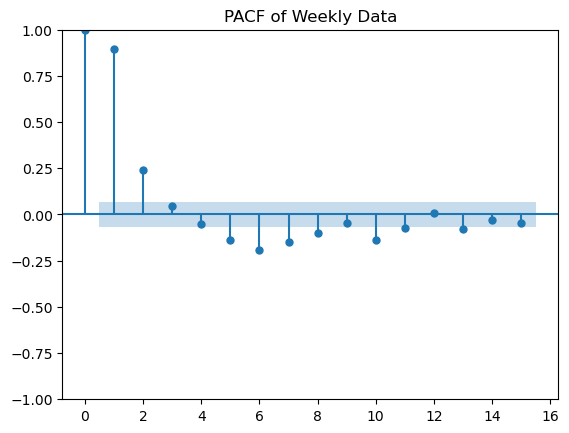

In [21]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(10, 6))
plot_pacf(daily_ghi, lags=15, method='ywm', title='PACF of Daily Data')  
plt.show()


plt.figure(figsize=(10, 6))
plot_pacf(weekly_ghi, lags=15, method='ywm', title='PACF of Weekly Data')  
plt.show()

- For weekly data, The PACF plot shows significant partial correlations for the first lag or two, then quickly decays, meaning there might be an AR process (likely of order 2 or 3)
- The rapid decline of PACF after a few lags is a sign that the time series can be modeled using an AR process.

In [22]:
df.head()

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Snow Depth,Wind Speed
Datetime,,,,,,,,,,,,,,,,,,
2000-01-01 00:00:00,2000,1,1,0,0,0,0,0,0,0,0,-4,13.811437,982.749817,27.447862,174.755997,0,3.976945
2000-01-01 01:00:00,2000,1,1,1,0,0,0,0,0,0,0,-4,13.117300,982.670105,29.048857,169.544205,0,4.017371
2000-01-01 02:00:00,2000,1,1,2,0,0,0,0,0,0,0,-4,12.433960,982.404175,31.216659,156.340938,0,3.992325
2000-01-01 03:00:00,2000,1,1,3,0,0,0,0,0,0,0,-3,11.797632,982.555298,34.956075,142.945864,0,3.981812
2000-01-01 04:00:00,2000,1,1,4,0,0,0,0,0,0,0,-1,11.195487,982.558105,41.177540,129.625767,0,3.985008


In [56]:
daily_ghi_df = pd.DataFrame(daily_ghi)
weekly_ghi_df= pd.DataFrame(weekly_ghi)

In [57]:
daily_ghi_df.head()

,GHI
Datetime,
2000-01-01,4204
2000-01-02,4185
2000-01-03,4233
2000-01-04,4212
2000-01-05,4181


### Splitting the data into train and test 

In [185]:
#SPLITTING THE DATA
split_ratio = 0.8


train_size_daily = int(len(daily_ghi_df) * split_ratio)
train_daily, test_daily = daily_ghi_df[:train_size_daily], daily_ghi_df[train_size_daily:]

train_size_weekly = int(len(weekly_ghi_df) * split_ratio)
train_weekly, test_weekly = weekly_ghi_df[:train_size_weekly], weekly_ghi_df[train_size_weekly:]


print("Number of Daily Training Data Points:", len(train_daily))
print("Number of Daily Testing Data Points:", len(test_daily))
print("Number of Weekly Training Data Points:", len(train_weekly))
print("Number of Weekly Testing Data Points:", len(test_weekly))


Number of Daily Training Data Points: 4383
Number of Daily Testing Data Points: 1096
Number of Weekly Training Data Points: 627
Number of Weekly Testing Data Points: 157


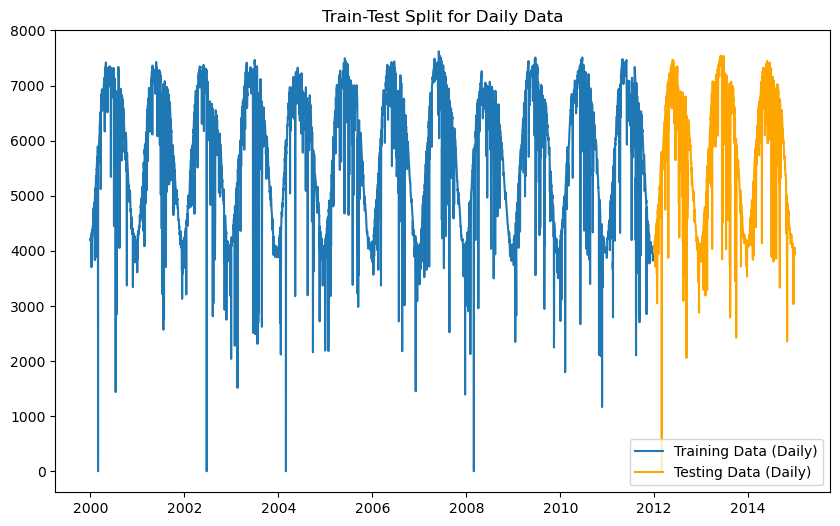

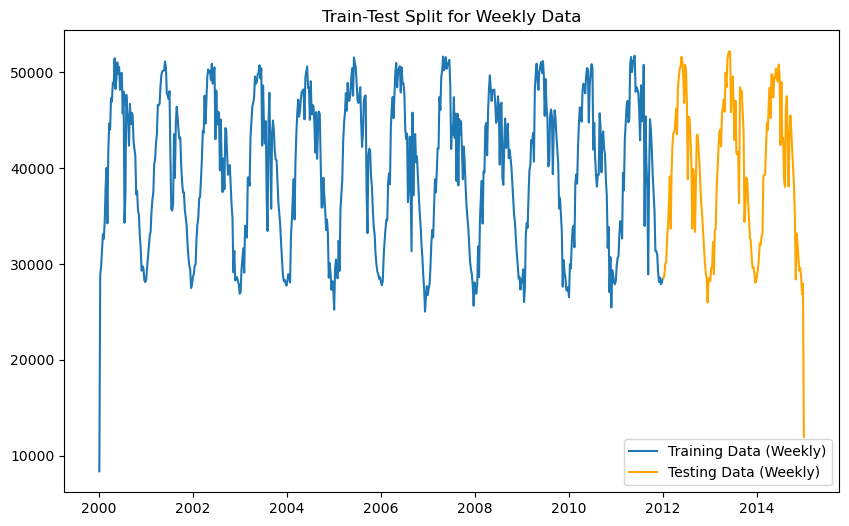

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(train_daily, label='Training Data (Daily)')
plt.plot(test_daily, label='Testing Data (Daily)', color='orange')
plt.title('Train-Test Split for Daily Data')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(train_weekly, label='Training Data (Weekly)')
plt.plot(test_weekly, label='Testing Data (Weekly)', color='orange')
plt.title('Train-Test Split for Weekly Data')
plt.legend()
plt.show()


We will start with some of the Deep Learning Models, which model sequential data well, before moving to the time series models

## DEEP LEARNING MODELS--

### Fitting a Long-Short Term Memory(LSTM) Model

For daily Data

Epoch 1/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0560 - val_loss: 0.0077
Epoch 2/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0072 - val_loss: 0.0072
Epoch 3/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0069 - val_loss: 0.0076
Epoch 4/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0067 - val_loss: 0.0084
Epoch 5/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0076 - val_loss: 0.0068
Epoch 6/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0068 - val_loss: 0.0071
Epoch 7/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0070 - val_loss: 0.0078
Epoch 8/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0073 - val_loss: 0.0067
Epoch 9/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0064 - val_loss: 0.0064
Epoch 10/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0066 - val_loss: 0.0065
Epoch 11/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0064 - val_loss: 0.0068
Epoch 12/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 

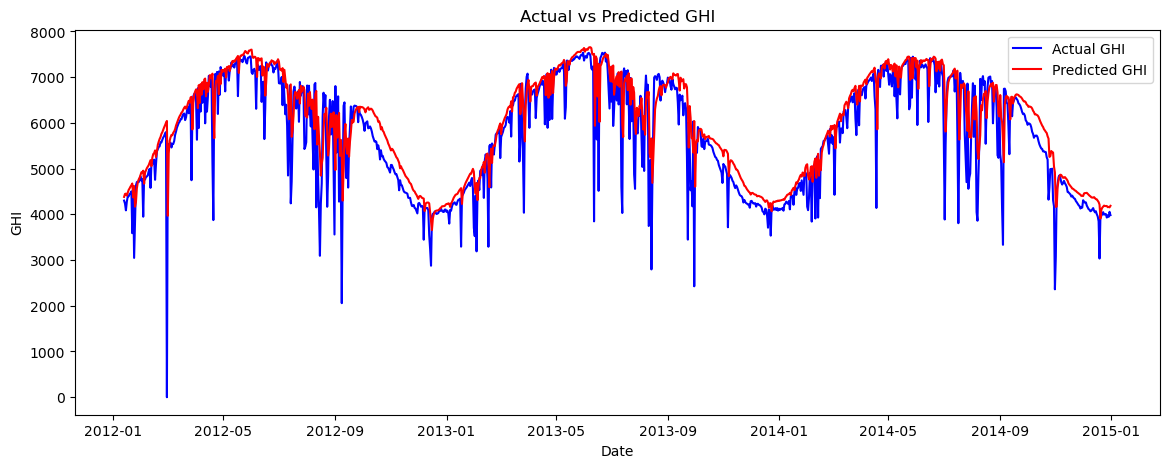

Mean Absolute Error (MAE): 397.2845648170837


In [230]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

ghi_values = daily_ghi_df['GHI'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_ghi = scaler.fit_transform(ghi_values)

def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(len(data) - seq_length):
        x.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(x), np.array(y)

sequence_length = 60  
X, y = create_sequences(scaled_ghi, sequence_length)
split_ratio = 0.8
train_size = int(len(X) * split_ratio)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(sequence_length, 1)))  
model.add(LSTM(50))  
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

plt.figure(figsize=(14, 5))
plt.plot(daily_ghi_df.index[-len(y_test):], y_test_rescaled, color='blue', label='Actual GHI')
plt.plot(daily_ghi_df.index[-len(y_test):], y_pred_rescaled, color='red', label='Predicted GHI')
plt.title('Actual vs Predicted GHI')
plt.xlabel('Date')
plt.ylabel('GHI')
plt.legend()
plt.show()

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
print(f"Mean Absolute Error (MAE): {mae}")



For weekly data

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.1678 - val_loss: 0.0242
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0220 - val_loss: 0.0208
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0183 - val_loss: 0.0171
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0138 - val_loss: 0.0121
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0092 - val_loss: 0.0094
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0074 - val_loss: 0.0086
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0073 - val_loss: 0.0081
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0067 - val_loss: 0.0078
Epoch 9/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0059 - val_loss: 0.0088
Epoch 10/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0063 - val_loss: 0.0070
Epoch 11/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0055 - val_loss: 0.0069
Epoch 12/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0

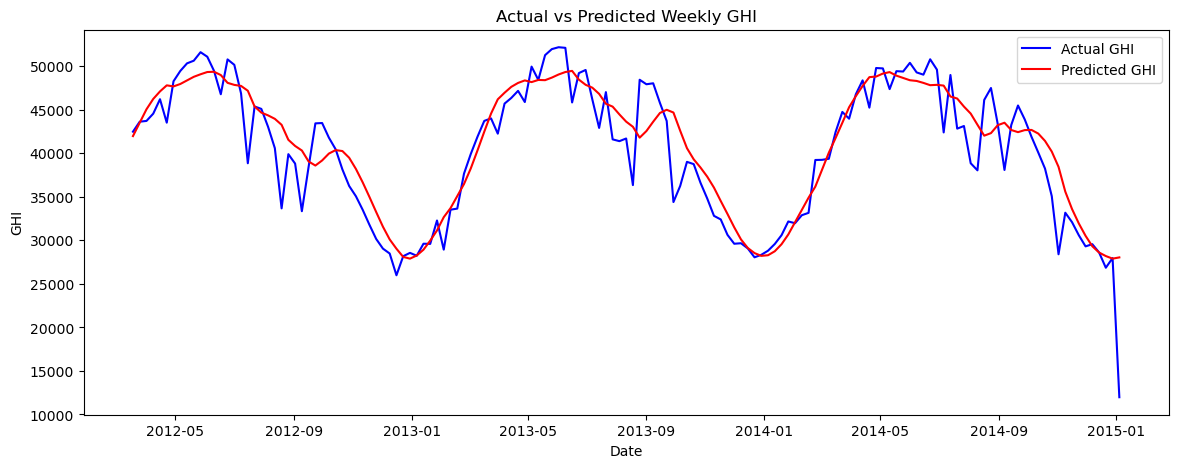

In [233]:
ghi_values = weekly_ghi_df['GHI'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_ghi = scaler.fit_transform(ghi_values)

def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(len(data) - seq_length):
        x.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(x), np.array(y)


sequence_length = 52  
X, y = create_sequences(scaled_ghi, sequence_length)

split_ratio = 0.8
train_size = int(len(X) * split_ratio)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(sequence_length, 1)))  
model.add(LSTM(50))  
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
print(f"Mean Absolute Error (MAE): {mae}")

plt.figure(figsize=(14, 5))
plt.plot(weekly_ghi_df.index[-len(y_test):], y_test_rescaled, color='blue', label='Actual GHI')
plt.plot(weekly_ghi_df.index[-len(y_test):], y_pred_rescaled, color='red', label='Predicted GHI')
plt.title('Actual vs Predicted Weekly GHI')
plt.xlabel('Date')
plt.ylabel('GHI')
plt.legend()
plt.show()


LSTM provides a good fit for our data because it effectively captures long-term dependencies, handles non-linear patterns, and adapts to dynamic temporal changes, making it ideal for complex, seasonal, and multivariate time series data.

### Fitting a Gated Recurrent unit(GRU) Model

Epoch 1/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0863
Epoch 2/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0126
Epoch 3/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0105
Epoch 4/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0108
Epoch 5/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0109
Epoch 6/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0099
Epoch 7/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0107
Epoch 8/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0100
Epoch 9/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0085
Epoch 10/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0086
Epoch 11/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0095
Epoch 12/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0095
Epoch 13/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0081
Epoch 14/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0084
Epoch 15/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 1

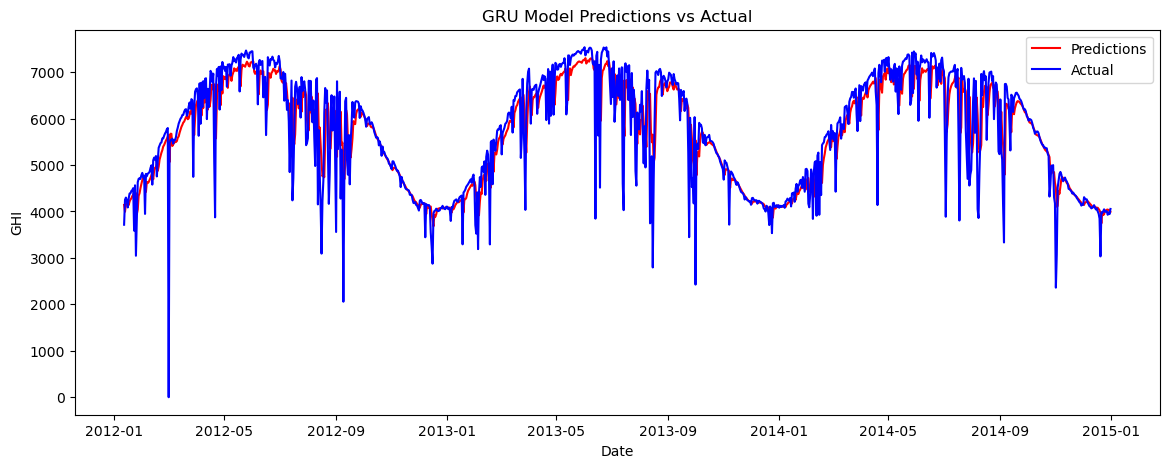

In [235]:
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout

data = daily_ghi_df['GHI'].values.reshape(-1, 1)  
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 10  
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(GRU(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32)  

predictions = model.predict(X_test)
predictions_rescaled = scaler.inverse_transform(predictions)  
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))  

mae = mean_absolute_error(y_test_rescaled, predictions_rescaled)
print(f'Mean Absolute Error (MAE): {mae:.4f}')

plt.figure(figsize=(14, 5))
plt.plot(daily_ghi_df.index[train_size + time_step + 1:], predictions_rescaled, label='Predictions', color='red')
plt.plot(daily_ghi_df.index[train_size + time_step + 1:], y_test_rescaled, label='Actual', color='blue')
plt.title('GRU Model Predictions vs Actual')
plt.xlabel('Date')
plt.ylabel('GHI')
plt.legend()
plt.show()


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.2430
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0232
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0197
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0179
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0156
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0136
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0123
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0136
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0121
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0124
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0129
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0109
Epoch 13/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0116
Epoch 14/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0110
Epoch 15/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - lo

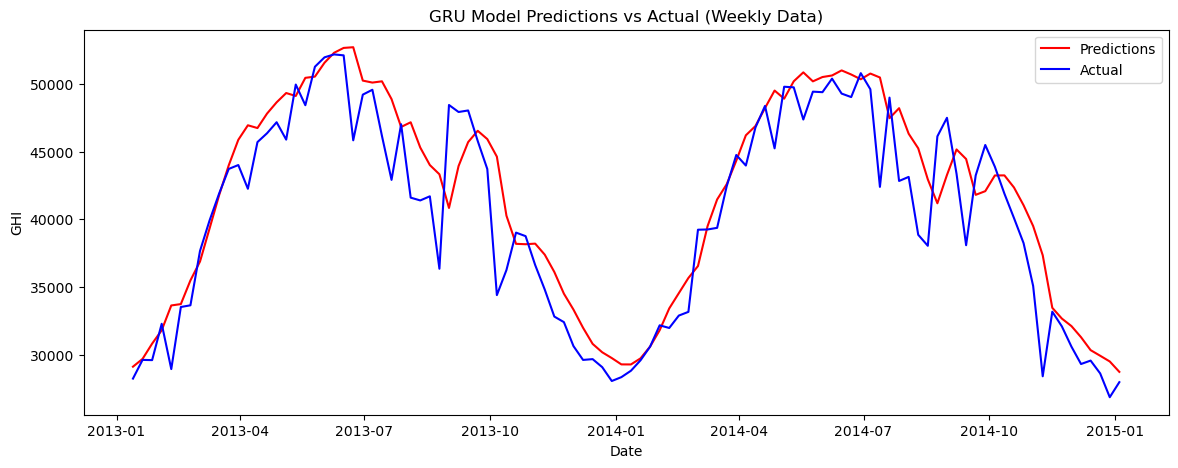

In [236]:
data = weekly_ghi_df['GHI'].values.reshape(-1, 1)  
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 52
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(GRU(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))


model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32)  
predictions = model.predict(X_test)
predictions_rescaled = scaler.inverse_transform(predictions)  
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))  

mae = mean_absolute_error(y_test_rescaled, predictions_rescaled)
print(f'Mean Absolute Error (MAE): {mae:.4f}')

plt.figure(figsize=(14, 5))
plt.plot(weekly_ghi_df.index[train_size + time_step + 1:], predictions_rescaled, label='Predictions', color='red')
plt.plot(weekly_ghi_df.index[train_size + time_step + 1:], y_test_rescaled, label='Actual', color='blue')
plt.title('GRU Model Predictions vs Actual (Weekly Data)')
plt.xlabel('Date')
plt.ylabel('GHI')
plt.legend()
plt.show()

GRU provides a good fit for GHI forecasting because it simplifies the architecture of LSTM while retaining the ability to capture long-term dependencies and temporal patterns, making it efficient and effective for time series data with less computational complexity.




## TIME SERIES MODELS

### AR (Auto-Regression) Model

Daily Data

In [225]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm

def mean_absolute_percentage_error(true, pred):
    true = np.array(true)
    pred = np.array(pred)
    mask = (true != 0) & ~np.isnan(true) & ~np.isnan(pred)
    true = true[mask]
    pred = pred[mask]

    if len(true) == 0:
        return np.nan

    return np.mean(np.abs((true - pred) / true)) * 100

def mean_absolute_error(true, pred):
    return np.mean(np.abs(np.array(true) - np.array(pred)))


best_mae = float('inf')
best_p = None

for p in range(1, 31):  # range is extended to try and check the model fit for as much values as feasable
    model = AutoReg(train_daily['GHI'], lags=p)
    model_fit = model.fit()
    all_predictions = model_fit.predict(start=0, end=len(daily_ghi_df)-1, dynamic=False)
    mae = mean_absolute_error(test_daily['GHI'], all_predictions[train_size_daily:])
    print(f'AR({p}) - Mean Absolute Error on Test Set: {mae:.2f}')
    if mae < best_mae:
        best_mae = mae
        best_p = p


final_model = AutoReg(train_daily['GHI'], lags=best_p)
final_model_fit = final_model.fit()

all_predictions = final_model_fit.predict(start=len(train_daily), end=len(daily_ghi_df)-1, dynamic=False)
print(f'Best hyperparameter (p): {best_p}')
mape = mean_absolute_percentage_error(test_daily['GHI'], all_predictions)
print(f'MAPE on the test dataset: {mape:.2f}%')
print(f'MAE on the test dataset: {best_mae:.2f}')

AR(1) - Mean Absolute Error on Test Set: 1035.86
AR(2) - Mean Absolute Error on Test Set: 1028.53
AR(3) - Mean Absolute Error on Test Set: 1020.76
AR(4) - Mean Absolute Error on Test Set: 1013.87
AR(5) - Mean Absolute Error on Test Set: 1012.21
AR(6) - Mean Absolute Error on Test Set: 1014.66
AR(7) - Mean Absolute Error on Test Set: 1019.87
AR(8) - Mean Absolute Error on Test Set: 1025.69
AR(9) - Mean Absolute Error on Test Set: 1030.37
AR(10) - Mean Absolute Error on Test Set: 1040.52
AR(11) - Mean Absolute Error on Test Set: 1049.92
AR(12) - Mean Absolute Error on Test Set: 1053.05
AR(13) - Mean Absolute Error on Test Set: 1058.30
AR(14) - Mean Absolute Error on Test Set: 1059.06
AR(15) - Mean Absolute Error on Test Set: 1067.49
AR(16) - Mean Absolute Error on Test Set: 1069.73
AR(17) - Mean Absolute Error on Test Set: 1079.31
AR(18) - Mean Absolute Error on Test Set: 1082.79
AR(19) - Mean Absolute Error on Test Set: 1082.71
AR(20) - Mean Absolute Error on Test Set: 1085.56
AR(21) - 

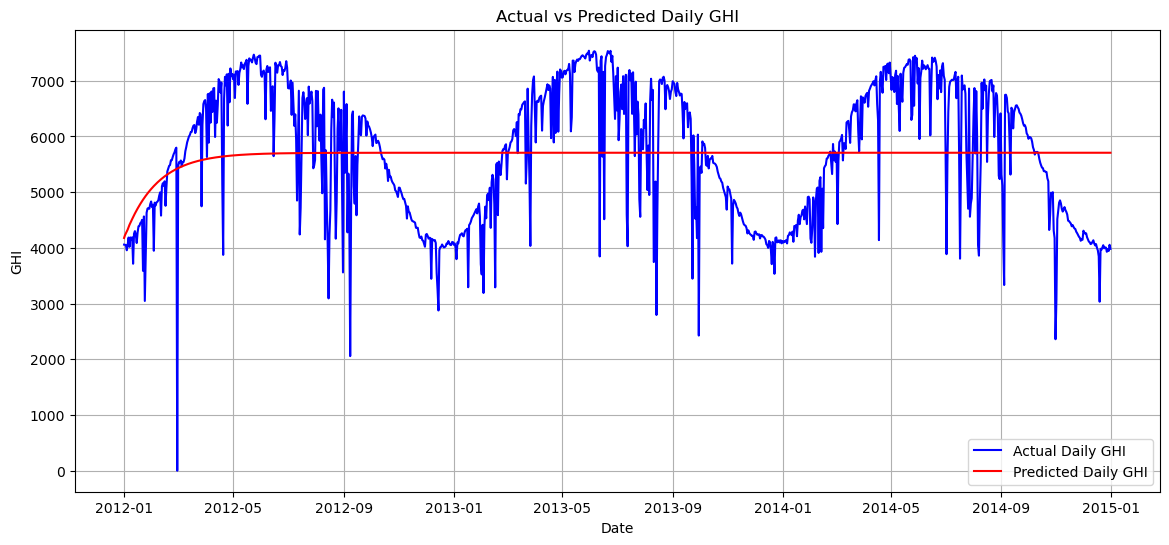

In [226]:
# Daily Plot
plt.figure(figsize=(14, 6))
plt.plot(test_daily.index, test_daily, label='Actual Daily GHI', color='blue')
plt.plot(test_daily.index, all_predictions[train_size_daily:], label='Predicted Daily GHI', color='red')
plt.title('Actual vs Predicted Daily GHI')
plt.xlabel('Date')
plt.ylabel('GHI')
plt.legend()
plt.grid(True)
plt.show()

#

#### Weekly Data

In [227]:
best_mae = float('inf')
best_p = None

for p in range(1, 31):  
    model = AutoReg(train_weekly['GHI'], lags=p)
    model_fit = model.fit()   
    all_predictions = model_fit.predict(start=0, end=len(weekly_ghi_df)-1, dynamic=False)
    mae = mean_absolute_error(test_weekly['GHI'], all_predictions[train_size_weekly:])
    print(f'AR({p}) - Mean Absolute Error on Test Set: {mae:.2f}')
    if mae < best_mae:
        best_mae = mae
        best_p = p

final_model = AutoReg(train_weekly['GHI'], lags=best_p)
final_model_fit = final_model.fit()
all_predictions = final_model_fit.predict(start=len(train_weekly), end=len(weekly_ghi_df)-1, dynamic=False)
print(f'Best hyperparameter (p): {best_p}')
mape = mean_absolute_percentage_error(test_weekly['GHI'], all_predictions)
print(f'MAPE on the test dataset: {mape:.2f}%')
print(f'MAE on the test dataset: {best_mae:.2f}')

AR(1) - Mean Absolute Error on Test Set: 6586.02
AR(2) - Mean Absolute Error on Test Set: 6854.50
AR(3) - Mean Absolute Error on Test Set: 6905.52
AR(4) - Mean Absolute Error on Test Set: 6827.86
AR(5) - Mean Absolute Error on Test Set: 6637.09
AR(6) - Mean Absolute Error on Test Set: 6371.56
AR(7) - Mean Absolute Error on Test Set: 6158.51
AR(8) - Mean Absolute Error on Test Set: 6039.26
AR(9) - Mean Absolute Error on Test Set: 6005.30
AR(10) - Mean Absolute Error on Test Set: 5924.41
AR(11) - Mean Absolute Error on Test Set: 5848.13
AR(12) - Mean Absolute Error on Test Set: 5867.79
AR(13) - Mean Absolute Error on Test Set: 5725.22
AR(14) - Mean Absolute Error on Test Set: 5661.03
AR(15) - Mean Absolute Error on Test Set: 5543.30
AR(16) - Mean Absolute Error on Test Set: 5483.34
AR(17) - Mean Absolute Error on Test Set: 5399.31
AR(18) - Mean Absolute Error on Test Set: 5379.86
AR(19) - Mean Absolute Error on Test Set: 5228.84
AR(20) - Mean Absolute Error on Test Set: 5125.08
AR(21) - 

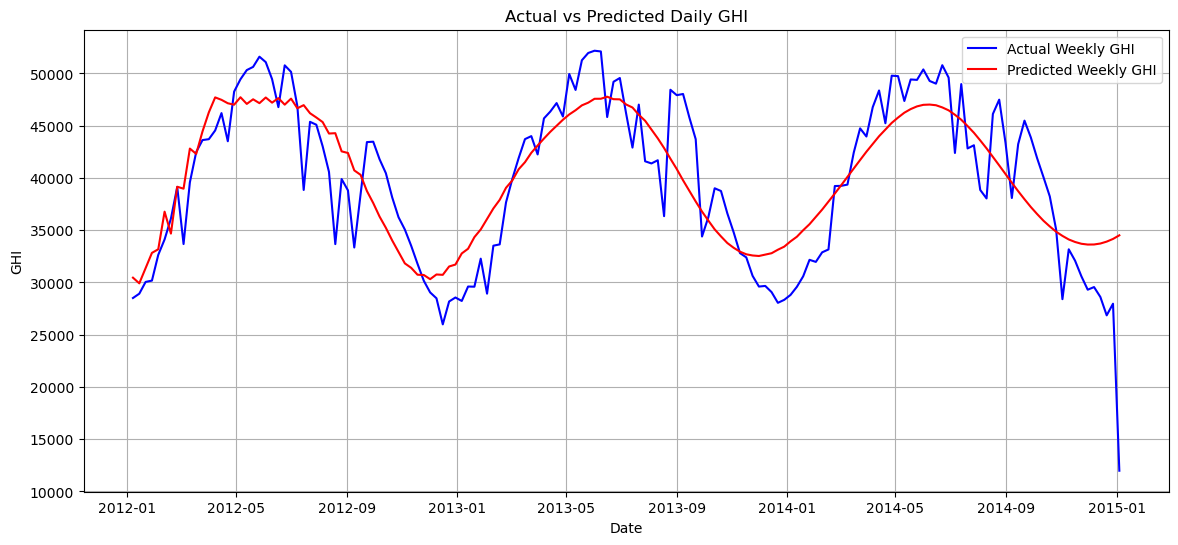

In [228]:
# Weekly Plot
plt.figure(figsize=(14, 6))
plt.plot(test_weekly.index, test_weekly, label='Actual Weekly GHI', color='blue')
plt.plot(test_weekly.index, all_predictions, label='Predicted Weekly GHI', color='red')
plt.title('Actual vs Predicted Daily GHI')
plt.xlabel('Date')
plt.ylabel('GHI')
plt.legend()
plt.grid(True)
plt.show()

- Weekly Data Gives a better fit than daily data, as expected from the PACF Plot, since for weekly data, the PACF plot showed significant partial correlations for the first lag or two, then quickly decays, meaning there might be an AR process 

### Moving Average(MA) Model 

Weekly Data

MA(1) - Mean Absolute Error on Test Set: 6692.64
MA(2) - Mean Absolute Error on Test Set: 6668.93
MA(3) - Mean Absolute Error on Test Set: 6639.32
MA(4) - Mean Absolute Error on Test Set: 6617.48
MA(5) - Mean Absolute Error on Test Set: 6590.20
MA(6) - Mean Absolute Error on Test Set: 6714.49
MA(7) - Mean Absolute Error on Test Set: 6453.64
MA(8) - Mean Absolute Error on Test Set: 6415.33
MA(9) - Mean Absolute Error on Test Set: 6380.09
MA(10) - Mean Absolute Error on Test Set: 6417.34
MA(11) - Mean Absolute Error on Test Set: 6442.89
MA(12) - Mean Absolute Error on Test Set: 6537.25
MA(13) - Mean Absolute Error on Test Set: 6515.37
MA(14) - Mean Absolute Error on Test Set: 6440.87
MA(15) - Mean Absolute Error on Test Set: 6502.61
MA(16) - Mean Absolute Error on Test Set: 6686.81
MA(17) - Mean Absolute Error on Test Set: 6748.03
MA(18) - Mean Absolute Error on Test Set: 6717.49
MA(19) - Mean Absolute Error on Test Set: 6688.46
Best hyperparameter (q): 9
MAPE on the entire dataset: 17.9

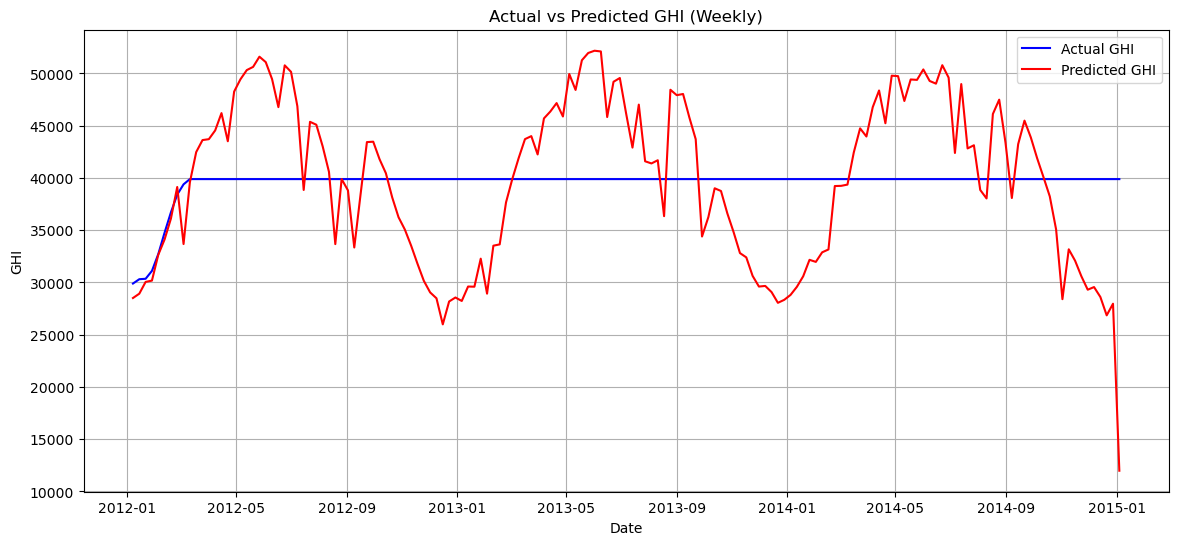

In [238]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

best_mae = float('inf')
best_q = None

for q in range(1, 20):  
    model = ARIMA(train_weekly['GHI'], order=(0, 0, q), trend='c')  
    model_fit = model.fit()

    predictions = model_fit.predict(start=len(train_weekly), end=len(train_weekly) + len(test_weekly) - 1)

    mae = mean_absolute_error(test_weekly['GHI'], predictions)

    print(f'MA({q}) - Mean Absolute Error on Test Set: {mae:.2f}')
    if mae < best_mae:
        best_mae = mae
        best_q = q

final_model = ARIMA(train_weekly['GHI'], order=(0, 0, best_q), trend='c')
final_model_fit = final_model.fit()

all_predictions = final_model_fit.predict(start=len(train_weekly), end=len(weekly_ghi_df)-1, dynamic=False)

print(f'Best hyperparameter (q): {best_q}')
mape = mean_absolute_percentage_error(test_weekly['GHI'], all_predictions)
print(f'MAPE on the entire dataset: {mape:.2f}%')
print(f'MAE on the entire dataset: {best_mae:.2f}')

plt.figure(figsize=(14, 6))
plt.plot(test_weekly.index, all_predictions, label='Actual GHI', color='blue')
plt.plot(test_weekly.index, test_weekly, label='Predicted GHI', color='red')
plt.title('Actual vs Predicted GHI (Weekly)')
plt.xlabel('Date')
plt.ylabel('GHI')
plt.legend()
plt.grid(True)
plt.show()


It clearly fits poorly. The reason is that When predicting more than k-steps ahead with an MA(k) model, the output becomes constant, or it "flattens", giving the mean of the series. This is why MA(k) models are generally not suited for long-term forecasts unless the series is relatively simple or stable.

### Using rolling predictions with MA

C:\Users\shubh\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\shubh\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\shubh\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\shubh\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\shubh\AppData\R

MAPE with rolling forecast: 8.13%
MAE with rolling forecast: 2918.43


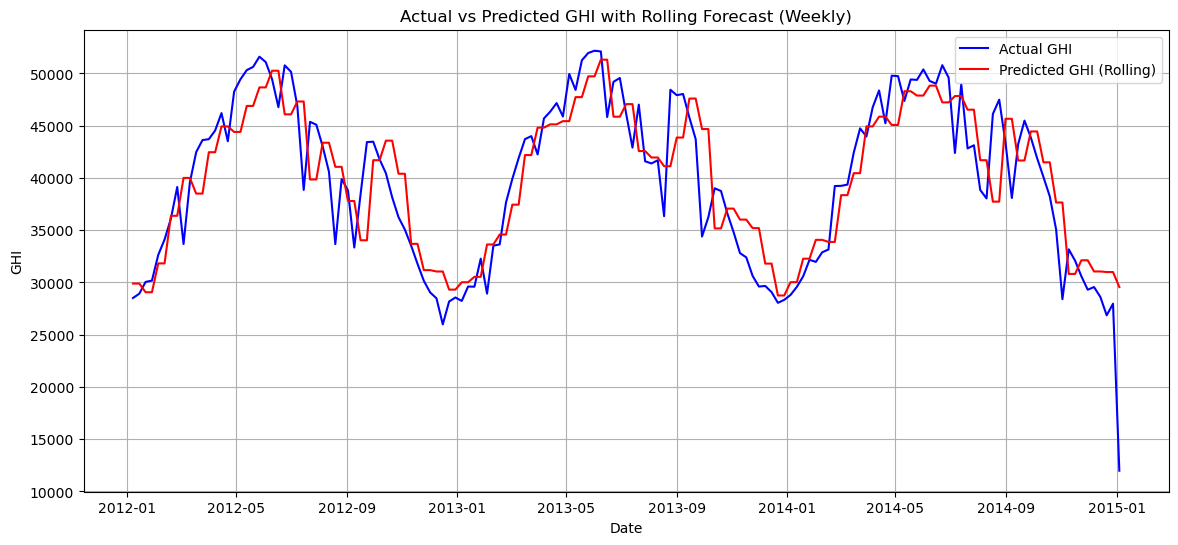

In [138]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

def mean_absolute_percentage_error(true, pred):
    true = np.array(true)
    pred = np.array(pred)

    mask = (true != 0) & ~np.isnan(true) & ~np.isnan(pred)
    true = true[mask]
    pred = pred[mask]

    if len(true) == 0:
        return np.nan

    return np.mean(np.abs((true - pred) / true)) * 100

retain_every = 2  

rolling_predictions = []
history = list(train_weekly['GHI']) 


for t in range(len(test_weekly)):
    if t % retain_every == 0 or t == 0:
        model = ARIMA(history, order=(0, 0, best_q), trend='c')
        model_fit = model.fit()

    pred = model_fit.forecast(steps=1)[0]
    rolling_predictions.append(pred)

    history.append(test_weekly['GHI'].iloc[t])

rolling_predictions = np.array(rolling_predictions)

mape = mean_absolute_percentage_error(test_weekly['GHI'], rolling_predictions)
mae = mean_absolute_error(test_weekly['GHI'], rolling_predictions)


print(f'MAPE with rolling forecast: {mape:.2f}%')
print(f'MAE with rolling forecast: {mae:.2f}')
plt.figure(figsize=(14, 6))
plt.plot(test_weekly.index, test_weekly['GHI'], label='Actual GHI', color='blue')
plt.plot(test_weekly.index, rolling_predictions, label='Predicted GHI (Rolling)', color='red')
plt.title('Actual vs Predicted GHI with Rolling Forecast (Weekly)')
plt.xlabel('Date')
plt.ylabel('GHI')
plt.legend()
plt.grid(True)
plt.show()


### Moving Average-- Daily Data using rolling forecast

MAPE with rolling forecast: 12.40%
MAE with rolling forecast: 653.25


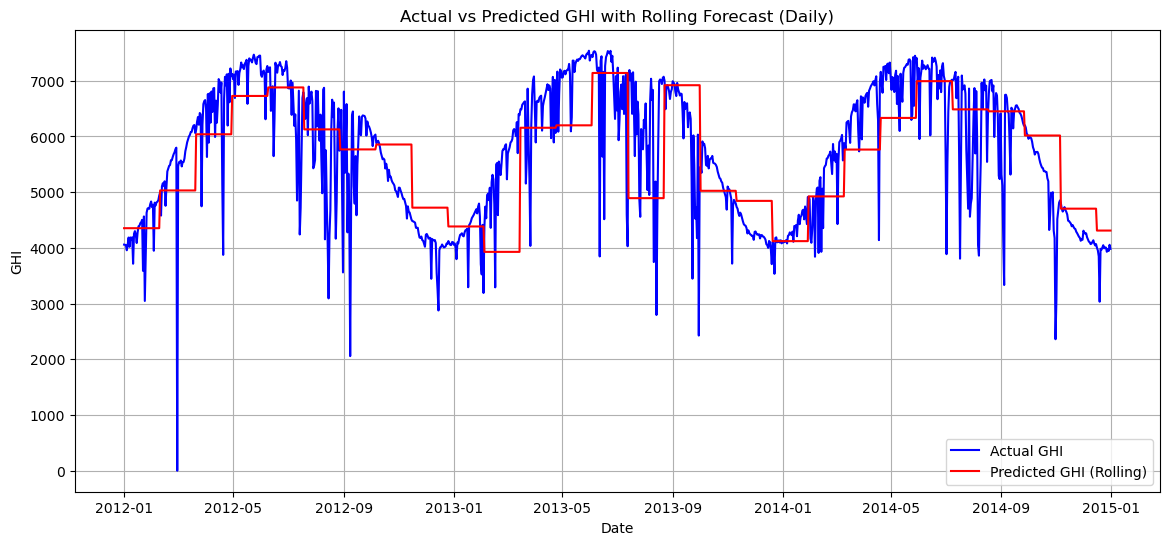

In [141]:
retain_every = 40  
rolling_predictions = []
history = list(train_daily['GHI'])  

for t in range(len(test_daily)):
    if t % retain_every == 0 or t == 0:
        model = ARIMA(history, order=(0, 0, 19), trend='c') #this 19 came out by first trying to fit MA model without using Rolling forecast, and finding the best q values  
        model_fit = model.fit()

    pred = model_fit.forecast(steps=1)[0]
    rolling_predictions.append(pred)

    history.append(test_daily['GHI'].iloc[t])

rolling_predictions = np.array(rolling_predictions)

mape = mean_absolute_percentage_error(test_daily['GHI'], rolling_predictions)
mae = mean_absolute_error(test_daily['GHI'], rolling_predictions)
print(f'MAPE with rolling forecast: {mape:.2f}%')
print(f'MAE with rolling forecast: {mae:.2f}')
plt.figure(figsize=(14, 6))
plt.plot(test_daily.index, test_daily['GHI'], label='Actual GHI', color='blue')
plt.plot(test_daily.index, rolling_predictions, label='Predicted GHI (Rolling)', color='red')
plt.title('Actual vs Predicted GHI with Rolling Forecast (Daily)')
plt.xlabel('Date')
plt.ylabel('GHI')
plt.legend()
plt.grid(True)
plt.show()

Can take lesser value of retain_every to improve the model further

### ARIMA(Auto- Regressive Integrated Moving Average) Model-- 

Daily Data

ARMA(0, 0) - AIC: 74602.75
ARMA(0, 1) - AIC: 72054.29
ARMA(0, 2) - AIC: 70970.72
ARMA(0, 3) - AIC: 70431.87
ARMA(0, 4) - AIC: 70127.27
ARMA(0, 5) - AIC: 69867.28
ARMA(0, 6) - AIC: 69677.98
ARMA(0, 7) - AIC: 69528.13
ARMA(0, 8) - AIC: 69405.29
ARMA(0, 9) - AIC: 69337.14
ARMA(1, 0) - AIC: 69432.48
ARMA(1, 1) - AIC: 68613.52
ARMA(1, 2) - AIC: 68459.01
ARMA(1, 3) - AIC: 68447.57
ARMA(1, 4) - AIC: 68449.18
ARMA(1, 5) - AIC: 68448.84
ARMA(1, 6) - AIC: 68450.18
ARMA(1, 7) - AIC: 68451.58
ARMA(1, 8) - AIC: 68453.90
ARMA(1, 9) - AIC: 68455.47
ARMA(2, 0) - AIC: 69040.17
ARMA(2, 1) - AIC: 68447.19
ARMA(2, 2) - AIC: 68449.07
ARMA(2, 3) - AIC: 68449.44
ARMA(2, 4) - AIC: 68449.75
ARMA(2, 5) - AIC: 68450.29
ARMA(2, 6) - AIC: 68452.05
ARMA(2, 7) - AIC: 68454.01
ARMA(2, 8) - AIC: 68455.33
ARMA(2, 9) - AIC: 68457.20
ARMA(3, 0) - AIC: 68854.37
ARMA(3, 1) - AIC: 68449.04
ARMA(3, 2) - AIC: 68451.19
ARMA(3, 3) - AIC: 68453.47
ARMA(3, 4) - AIC: 68448.89
ARMA(3, 5) - AIC: 68451.53
ARMA(3, 6) - AIC: 68453.49
A

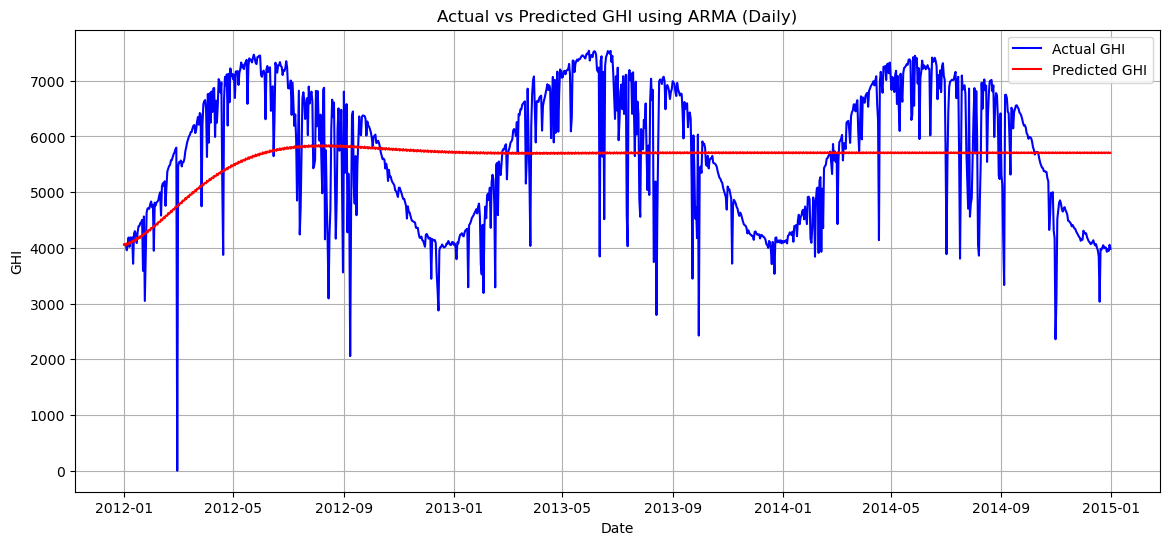

Best hyperparameter (order): (4, 0, 9)
MAPE on the test set: 19481559095444940.00%
MAE on the test set: 1038.29


In [192]:
import warnings
warnings.filterwarnings("ignore")

best_aic = float('inf')
best_order = None

for p in range(5): 
    for q in range(10):  
        try:
            model = sm.tsa.ARIMA(train_daily['GHI'], order=(p, 0, q))
            results = model.fit()
            aic = results.aic

            # Print and update best hyperparameter
            print(f'ARMA({p}, {q}) - AIC: {aic:.2f}')
            if aic < best_aic:
                best_aic = aic
                best_order = (p, 0, q)
        except Exception as e:
            continue


best_model = sm.tsa.ARIMA(train_daily['GHI'], order=best_order)
best_results = best_model.fit()

all_predictions = best_results.predict(start=len(train_daily), end=len(daily_ghi_df)-1)

plt.figure(figsize=(14, 6))
plt.plot(test_daily.index, test_daily['GHI'], label='Actual GHI', color='blue')
plt.plot(test_daily.index, all_predictions, label='Predicted GHI', color='red')
plt.title('Actual vs Predicted GHI using ARMA (Daily)')
plt.xlabel('Date')
plt.ylabel('GHI')
plt.legend()
plt.grid(True)
plt.show()

print(f'Best hyperparameter (order): {best_order}')


test_predictions = best_results.predict(start=train_size_daily, end=len(daily_ghi_df)-1)
mape = mean_absolute_percentage_error(test_daily['GHI'], test_predictions)
print(f'MAPE on the test set: {mape:.2f}%')
mae = mean_absolute_error(test_daily['GHI'], test_predictions)
print(f'MAE on the test set: {mae:.2f}')

Weekly Data

ARIMA(0, 0) - AIC: 16414.18
ARIMA(0, 1) - AIC: 12518.14
ARIMA(0, 2) - AIC: 12275.12
ARIMA(0, 3) - AIC: 12152.87
ARIMA(0, 4) - AIC: 12085.59
ARIMA(0, 5) - AIC: 12018.58
ARIMA(0, 6) - AIC: 12454.71
ARIMA(0, 7) - AIC: 12128.01
ARIMA(0, 8) - AIC: 11903.61
ARIMA(0, 9) - AIC: 11883.68
ARIMA(1, 0) - AIC: 11889.08
ARIMA(1, 1) - AIC: 11869.99
ARIMA(1, 2) - AIC: 11868.27
ARIMA(1, 3) - AIC: 11854.81
ARIMA(1, 4) - AIC: 11834.85
ARIMA(1, 5) - AIC: 11827.11
ARIMA(1, 6) - AIC: 11826.80
ARIMA(1, 7) - AIC: 11827.95
ARIMA(1, 8) - AIC: 11832.00
ARIMA(1, 9) - AIC: 11824.99
ARIMA(2, 0) - AIC: 11868.01
ARIMA(2, 1) - AIC: 11869.99
ARIMA(2, 2) - AIC: 11738.95
ARIMA(2, 3) - AIC: 11735.24
ARIMA(2, 4) - AIC: 11735.66
ARIMA(2, 5) - AIC: 11734.68
ARIMA(2, 6) - AIC: 11737.03
ARIMA(2, 7) - AIC: 11735.16
ARIMA(2, 8) - AIC: 11729.39
ARIMA(2, 9) - AIC: 11743.26
ARIMA(3, 0) - AIC: 11870.02
ARIMA(3, 1) - AIC: 11871.70
ARIMA(3, 2) - AIC: 11746.41
ARIMA(3, 3) - AIC: 11738.47
ARIMA(3, 4) - AIC: 11739.02
ARIMA(3, 5) - AIC: 1

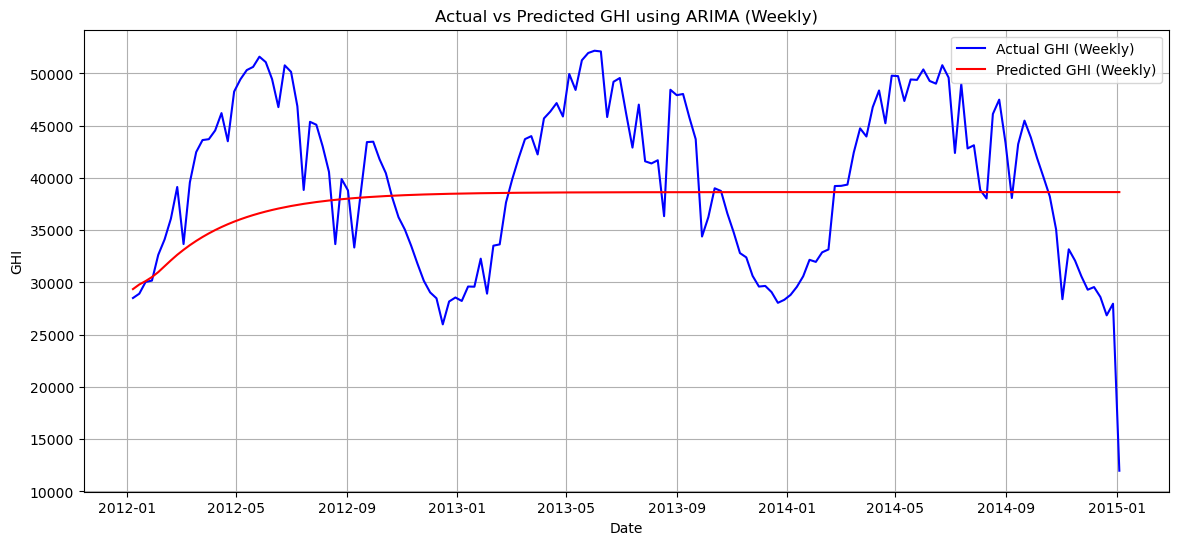

Best hyperparameter (order): (2, 1, 8)
MAPE on the test set: 0.19%
MAE on the test set: 6946.61


In [191]:
import warnings
warnings.filterwarnings("ignore")

best_aic = float('inf')
best_order = None


for p in range(5):  
    for q in range(10): 
        try:
            model = sm.tsa.ARIMA(train_weekly['GHI'], order=(p, 0, q))
            results = model.fit()
            aic = results.aic

            print(f'ARIMA({p}, {q}) - AIC: {aic:.2f}')
            if aic < best_aic:
                best_aic = aic
                best_order = (p, 1, q)
        except Exception as e:
            continue

best_model = sm.tsa.ARIMA(train_weekly['GHI'], order=best_order)
best_results = best_model.fit()
all_predictions = best_results.predict(start=len(train_weekly), end=len(weekly_ghi_df)-1)
plt.figure(figsize=(14, 6))
plt.plot(test_weekly.index, test_weekly['GHI'], label='Actual GHI (Weekly)', color='blue')
plt.plot(test_weekly.index, all_predictions, label='Predicted GHI (Weekly)', color='red')
plt.title('Actual vs Predicted GHI using ARIMA (Weekly)')
plt.xlabel('Date')
plt.ylabel('GHI')
plt.legend()
plt.grid(True)
plt.show()

print(f'Best hyperparameter (order): {best_order}')
test_predictions = best_results.predict(start=train_size_weekly, end=len(weekly_ghi_df)-1)
mape = mean_absolute_percentage_error(test_weekly['GHI'], test_predictions)
print(f'MAPE on the test set: {mape:.2f}%')
mae = mean_absolute_error(test_weekly['GHI'], test_predictions)
print(f'MAE on the test set: {mae:.2f}')

As expected, the ARIMA model do not give a good fit. This is because GHI data shows clear seasonal trends, with peaks and troughs repeating over time. ARIMA models are typically do not handle seasonality well unless it is explicitly accounted for (e.g., using SARIMA). This model likely didn't capture these patterns, leading to a poor fit.

### Fitting the SARIMA(SEASONAL AUTO REGRESSIVE INTEGRATED MOVING AVERAGE) Model--

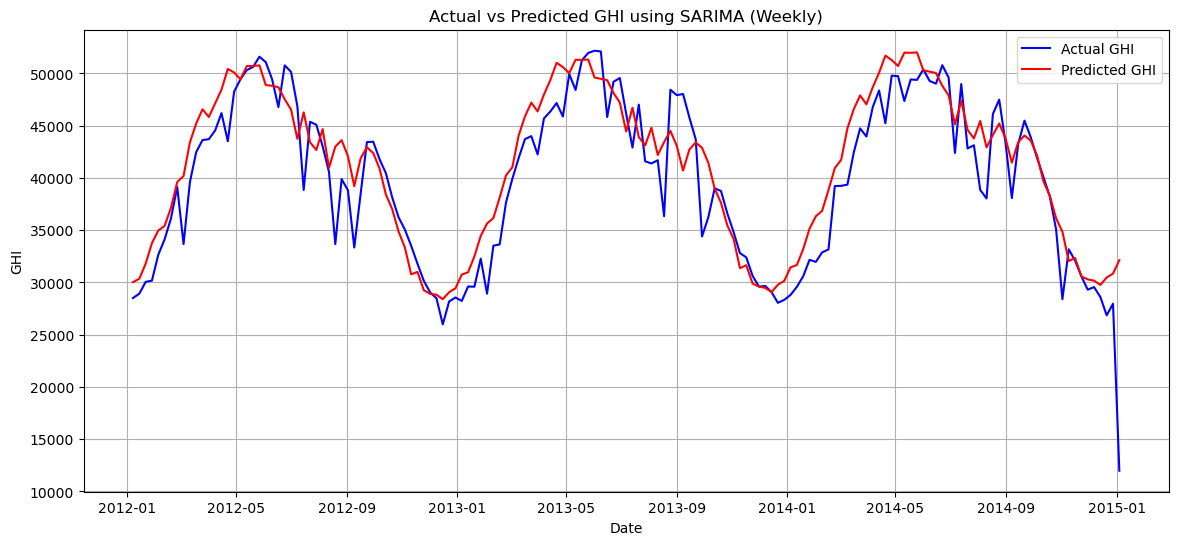

MAPE: 7.21%
MAE: 2482.62


In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX


def mean_absolute_percentage_error(true, pred):
    return np.mean(np.abs((np.array(true) - np.array(pred)) / np.array(true))) * 100

def mean_absolute_error(true, pred):
    return np.mean(np.abs(np.array(true) - np.array(pred)))


p, d, q = 1, 1, 1
m = 52  
P, D, Q = 1, 1, 1


model = sm.tsa.statespace.SARIMAX(train_weekly['GHI'], order=(p, d, q), seasonal_order=(P, D, Q, m))

results = model.fit()
all_predictions = results.forecast(len(test_weekly))


plt.figure(figsize=(14, 6))
plt.plot(test_weekly.index, test_weekly['GHI'], label='Actual GHI', color='blue')
plt.plot(test_weekly.index, all_predictions, label='Predicted GHI', color='red')
plt.title('Actual vs Predicted GHI using SARIMA (Weekly)')
plt.xlabel('Date')
plt.ylabel('GHI')
plt.legend()
plt.grid(True)
plt.show()


mape = mean_absolute_percentage_error(test_weekly['GHI'], all_predictions)
mae = mean_absolute_error(test_weekly['GHI'], all_predictions)

print(f"MAPE: {mape:.2f}%")
print(f"MAE: {mae:.2f}")



As expected, the SARIMA model gives a much better fit since the data clearly shows signs of seasonality and SARIMA incorporates seasonal components (P, D, Q) and a seasonal period m, which allowed the model to capture the repeating patterns in the data.

 Due to the computational intensity of the SARIMA model, its application to daily data was unfeasible. Hyperparameter tuning was not feasable as well, so only the smallest values we thought would work are employed.

### Fitting the FB Prophet Model

Daily Data

01:18:05 - cmdstanpy - INFO - Chain [1] start processing
01:18:05 - cmdstanpy - INFO - Chain [1] done processing


Daily MAE: 376.097960996796


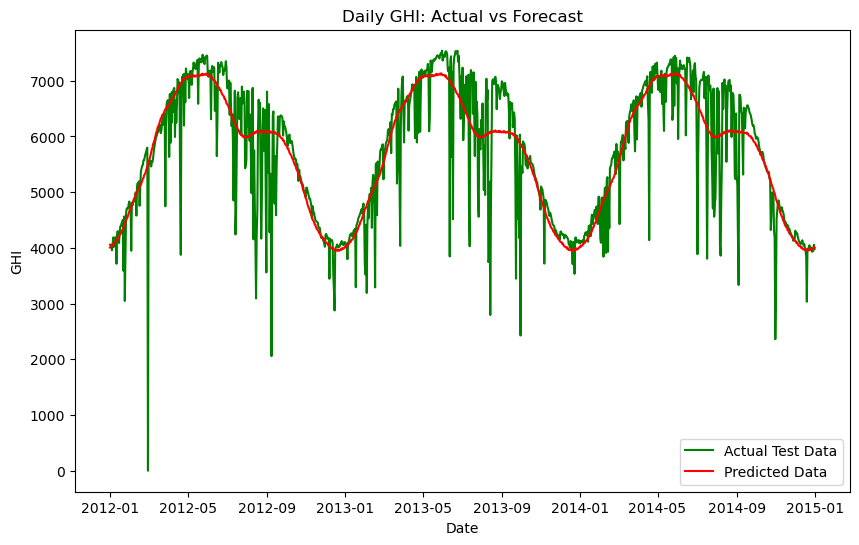

In [178]:
from prophet import Prophet

daily_ghi_prop = daily_ghi_df.rename(columns={'Datetime': 'ds', 'GHI': 'y'})
daily_ghi_prop['ds']= pd.to_datetime(daily_ghi_prop['ds'])

train_size = int(len(daily_ghi_prop) * 0.8)
train_daily = daily_ghi_prop[:train_size]
test_daily = daily_ghi_prop[train_size:]

daily_model = Prophet()
daily_model.fit(train_daily)

future_daily = daily_model.make_future_dataframe(periods=len(test_daily))
daily_forecast = daily_model.predict(future_daily)
predicted_test = daily_forecast[-len(test_daily):]['yhat'].values
actual_test = test_daily['y'].values

mae_daily = mean_absolute_error(actual_test, predicted_test)
print("Daily MAE:", mae_daily)

plt.figure(figsize=(10, 6))
plt.plot(test_daily['ds'], test_daily['y'], label="Actual Test Data", color='green')
plt.plot(test_daily['ds'], predicted_test, label="Predicted Data", color='red')
plt.title("Daily GHI: Actual vs Forecast")
plt.xlabel("Date")
plt.ylabel("GHI")
plt.legend()
plt.show()



Weekly Data

01:17:49 - cmdstanpy - INFO - Chain [1] start processing
01:17:49 - cmdstanpy - INFO - Chain [1] done processing


Weekly MSE: 1835.4127294901384


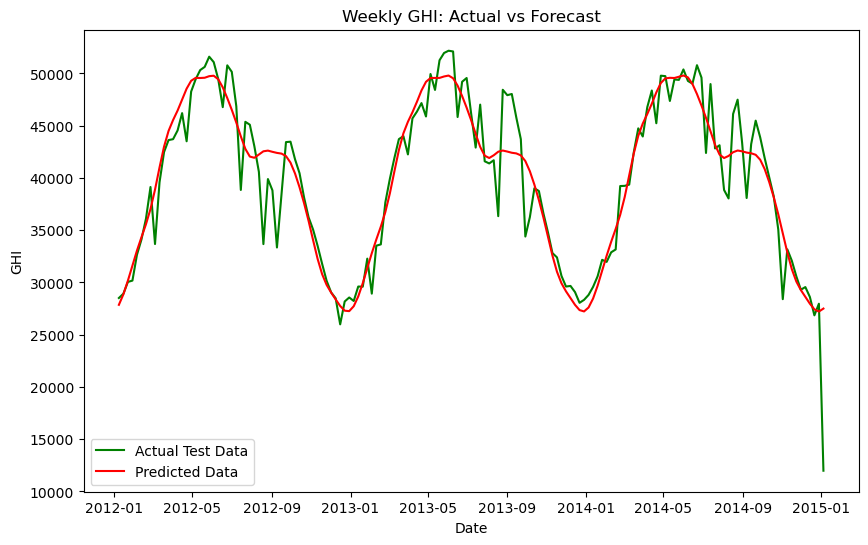

In [177]:
weekly_ghi_prop = weekly_ghi_df.reset_index().rename(columns={'Datetime': 'ds', 'GHI': 'y'})
weekly_ghi_prop['ds'] = pd.to_datetime(weekly_ghi_prop['ds'])

train_size = int(len(weekly_ghi_prop) * 0.8)
train_weekly = weekly_ghi_prop[:train_size]
test_weekly = weekly_ghi_prop[train_size:]


weekly_model = Prophet()
weekly_model.fit(train_weekly)
future_weekly = weekly_model.make_future_dataframe(periods=len(test_weekly), freq='W')
weekly_forecast = weekly_model.predict(future_weekly)


predicted_test_weekly = weekly_forecast[-len(test_weekly):]['yhat'].values
actual_test_weekly = test_weekly['y'].values

mae_weekly = mean_absolute_error(actual_test_weekly, predicted_test_weekly)
mape_weekly = mean_absolute_percentage_error(actual_test_weekly, predicted_test_weekly)
print("Weekly MSE:", mae_weekly)
plt.figure(figsize=(10, 6))
plt.plot(test_weekly['ds'], test_weekly['y'], label="Actual Test Data", color='green')
plt.plot(test_weekly['ds'], predicted_test_weekly, label="Predicted Data", color='red')
plt.title("Weekly GHI: Actual vs Forecast")
plt.xlabel("Date")
plt.ylabel("GHI")
plt.legend()
plt.show()


Prophet's combination of automatic seasonality detection, flexible trend modeling, and robustness to missing/outlier data makes it a great fit for our data, which exhibits complex seasonal patterns and occasional data fluctuations. The model is able to adapt to these characteristics better than ARIMA, especially when working with long-term data.